# **Projet de Détection de Fraude par Carte de Crédit**

L'augmentation des transactions par carte de crédit a conduit à une montée en flèche des fraudes, ce qui représente un défi majeur pour les institutions financières. Ce projet a pour objectif de prédire les transactions frauduleuses en analysant des caractéristiques telles que le montant de la transaction, le temps écoulé, et des variables techniques.
L'objectif principal est de développer des modèles prédictifs capables d'identifier les transactions frauduleuses en fonction des données disponibles.

Dans un premier temps, nous évaluerons les modèles sans procéder à un équilibrage des données, afin de comprendre leur performance dans un contexte réel, où les fraudes sont rares. Ensuite, nous appliquerons des techniques de rééquilibrage des données pour voir si elles améliorent la détection des fraudes. En comparant plusieurs méthodes, nous choisirons le modèle le plus performant pour détecter les fraudes dans des ensembles de données.

Vous pouvez telecharger les données en cliquant
[credit card fraud detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)



# I-Préparation des données





In [1]:
import numpy as np
import pandas as pd
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

In [2]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
print(df.shape)
print(df.dtypes)

(284807, 31)
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [3]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


On observe qu'effectivement, il n'y a pas de données manquantes dans notre jeu de données.

In [4]:
df.duplicated().sum()

1081

In [5]:
df=df.drop_duplicates()

Pour améliorer la qualité des modèles et de rendre les résultats plus fiables et précis, j'ai supprimé les variables dupliquées.

# II - EDA

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


Le tableau présente des statistiques descriptives d’un jeu de données utilisé pour détecter des fraudes dans des transactions par carte de crédit.
* Variables V1 à V28

Ces variables résultent d’une réduction dimensionnelle pour anonymiser les transactions, capturant leur variabilité. Les moyennes proches de 0 indiquent une normalisation. Les écarts types varient : par exemple, V1 (1.95) montre une forte dispersion, tandis que V28 (0.32) est plus stable. Certaines variables présentent des valeurs extrêmes, potentiellement liées à des transactions atypiques ou frauduleuses.
* Variable Montant

Cette variable représente les montants des transactions, avec une moyenne de 88.47 euros et un écart type élevé (250.39 euros). Le minimum est 0, ce qui pourrait indiquer des transactions tests ou annulées.
Le maximum est 25 691.16, un montant très élevé pouvant potentiellement représenter des transactions rares ou frauduleuses.
* Variable Class

Elle identifie les transactions normales (0) et frauduleuses (1), ces dernières ne représentant que 0.17 % des données.


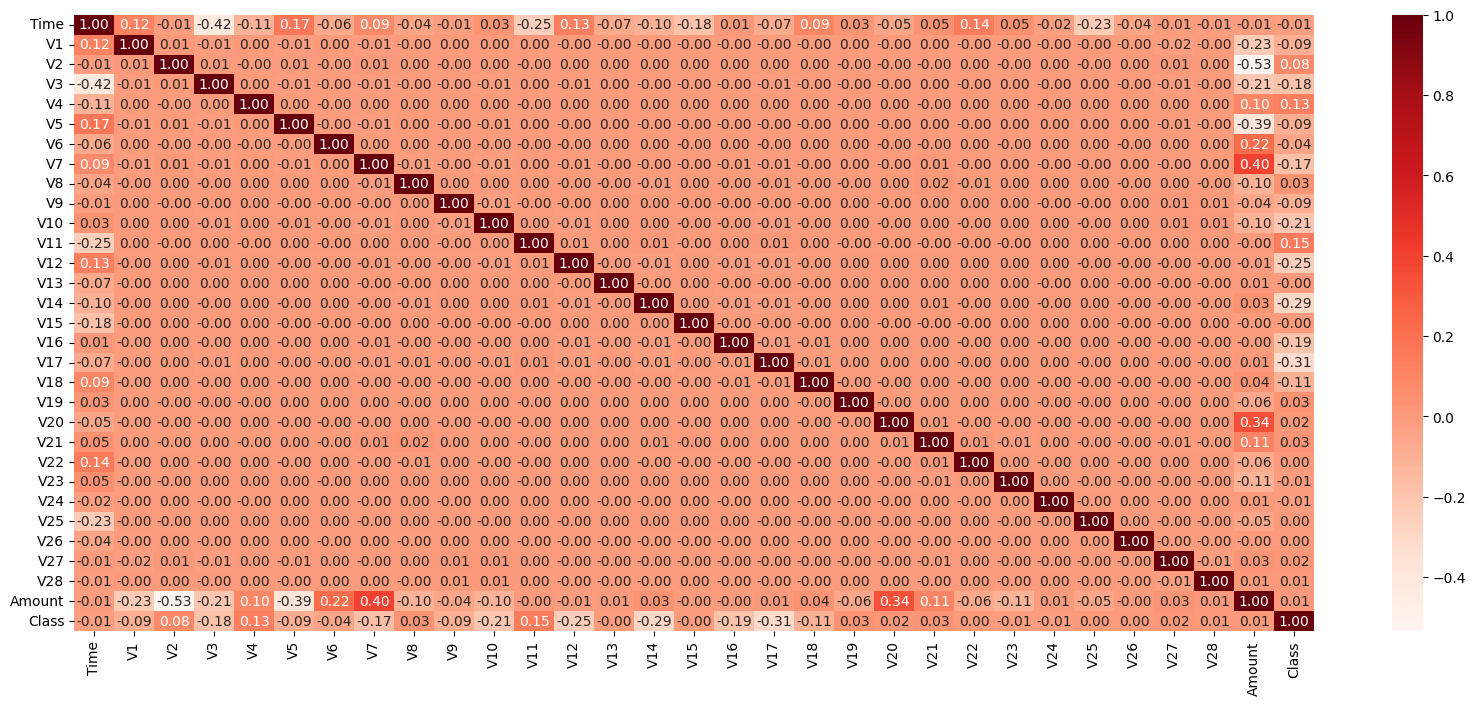

In [ ]:
plt.figure(figsize=(20,8))
corr = df.corr()
sns.heatmap(corr,cmap='Reds',annot=True,fmt='.2f')
plt.show()

Le tableau de corrélation nous donne une première idée des relations entre les variables et de leur potentiel pour prédire la fraude. Le tableau contient beaucoup de 0 et les chiffres sont inférieurs à 0.6, ce qui signifie que les variables sont très peu corrélées entre elles.

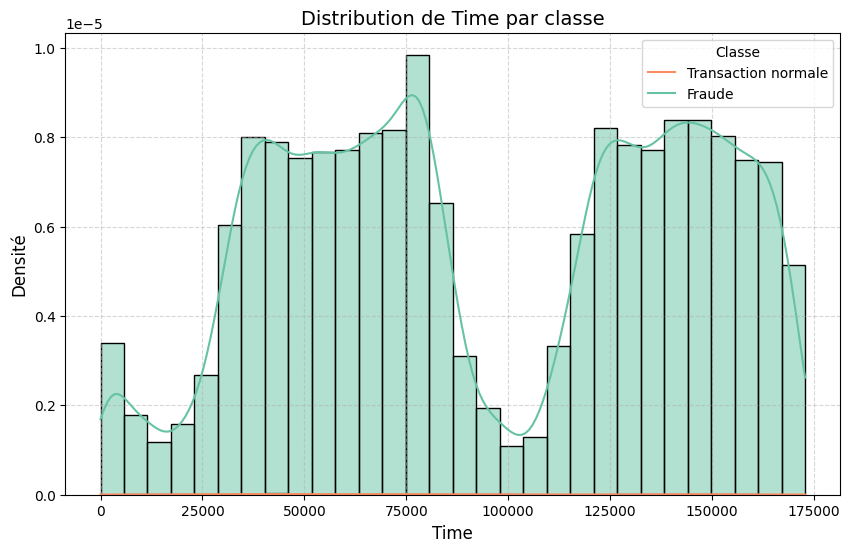

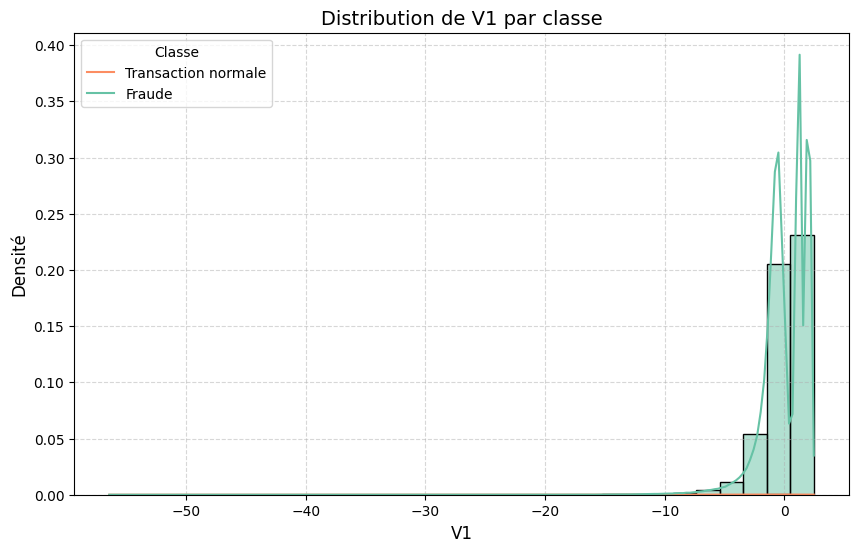

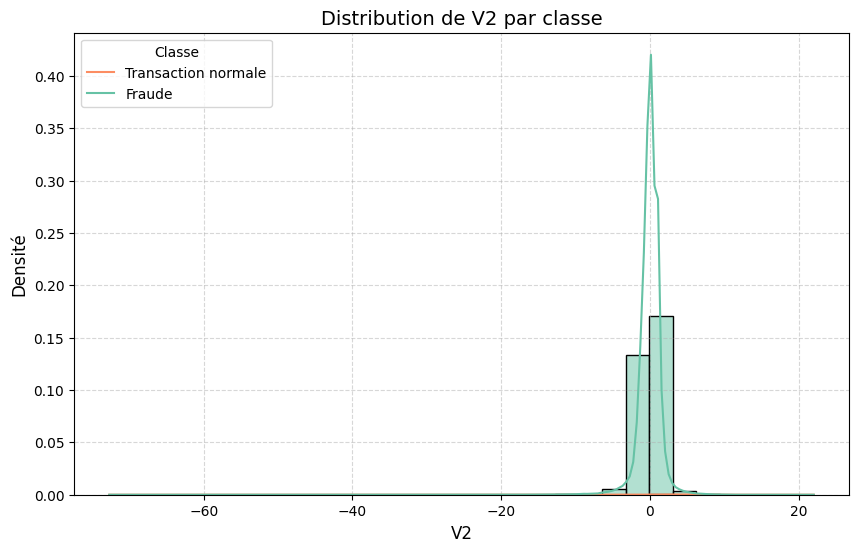

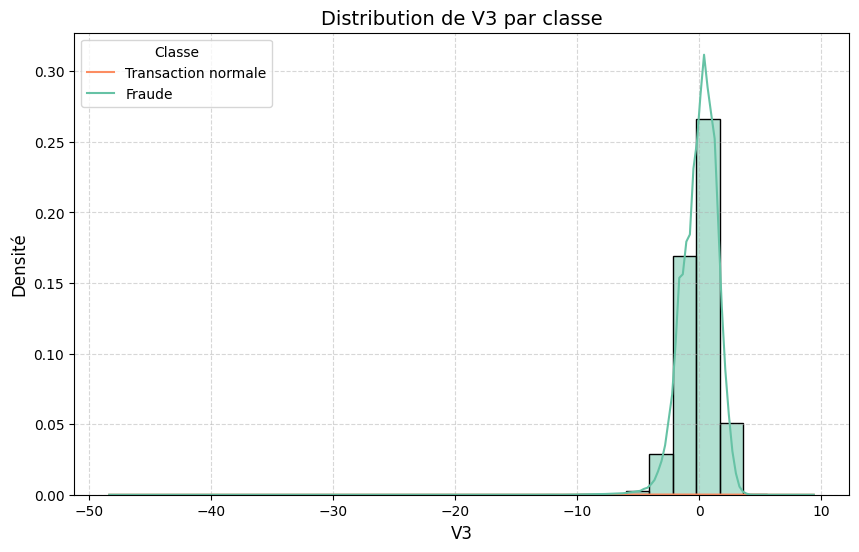

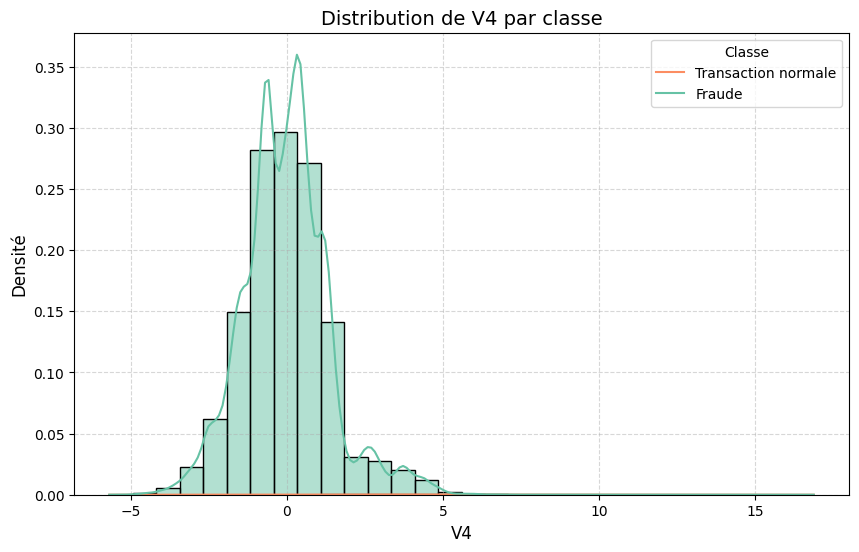

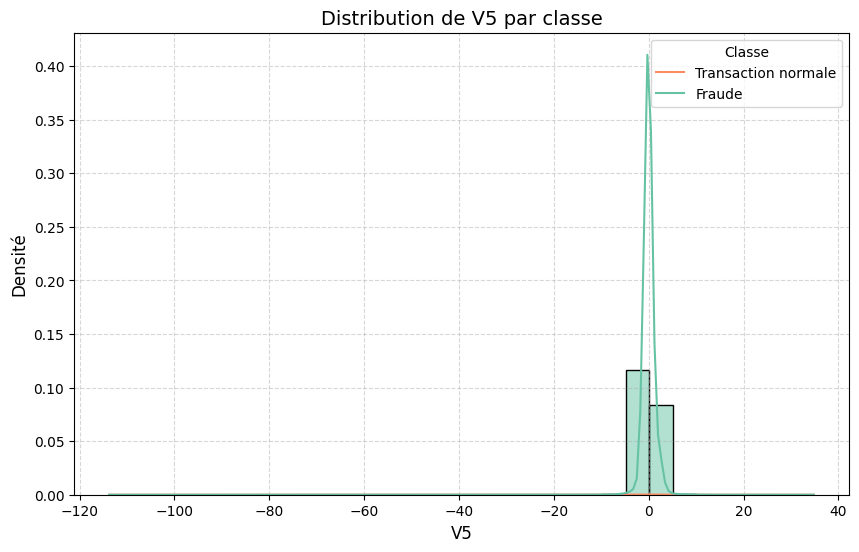

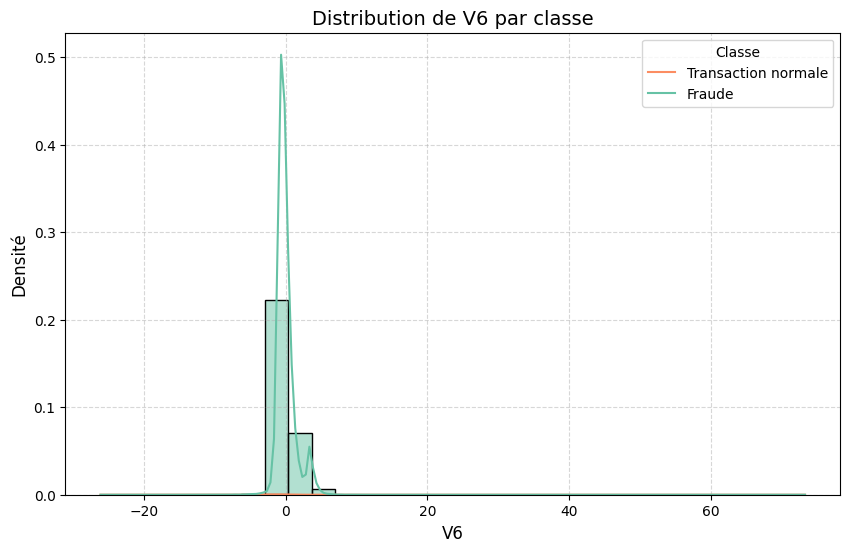

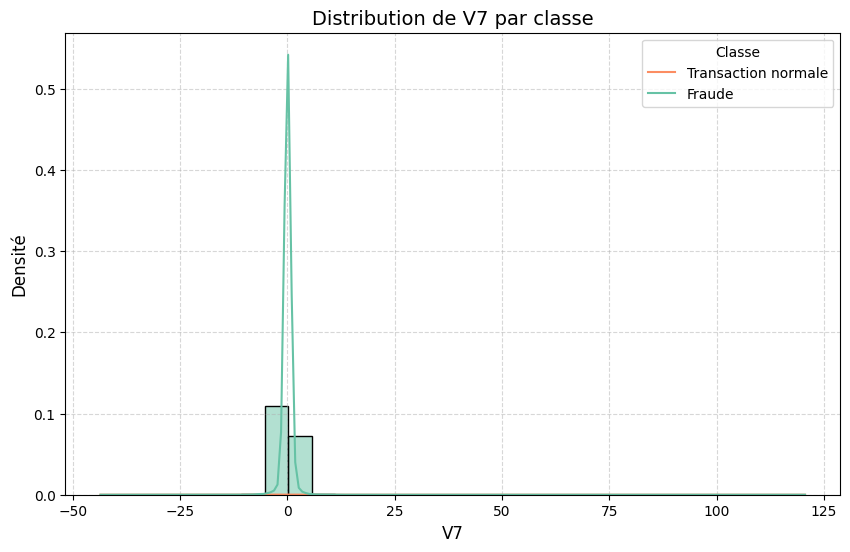

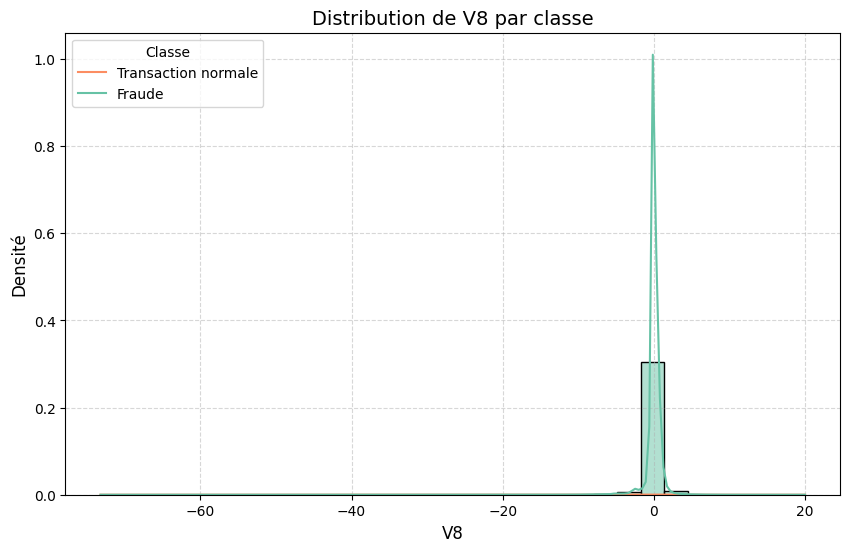

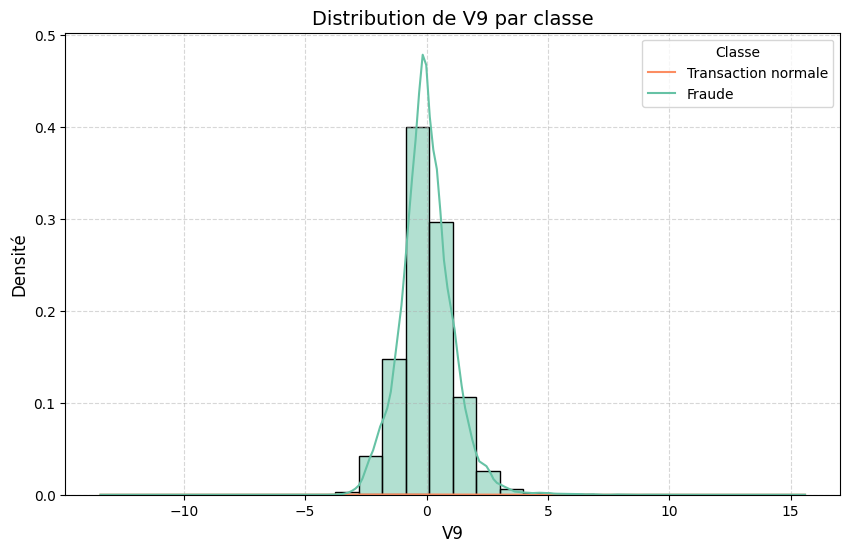

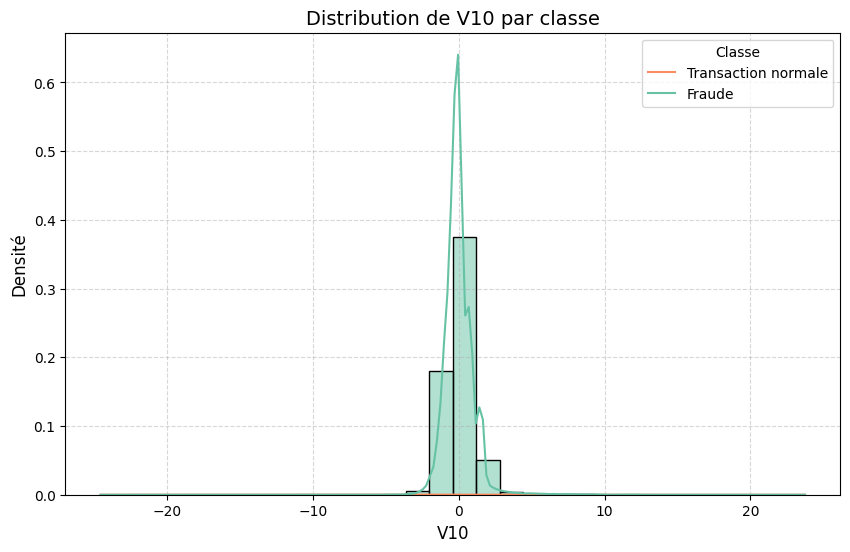

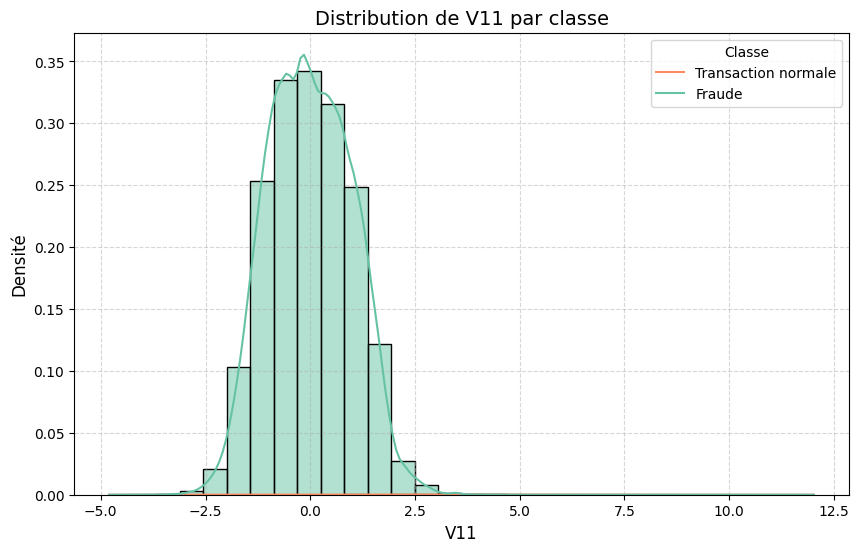

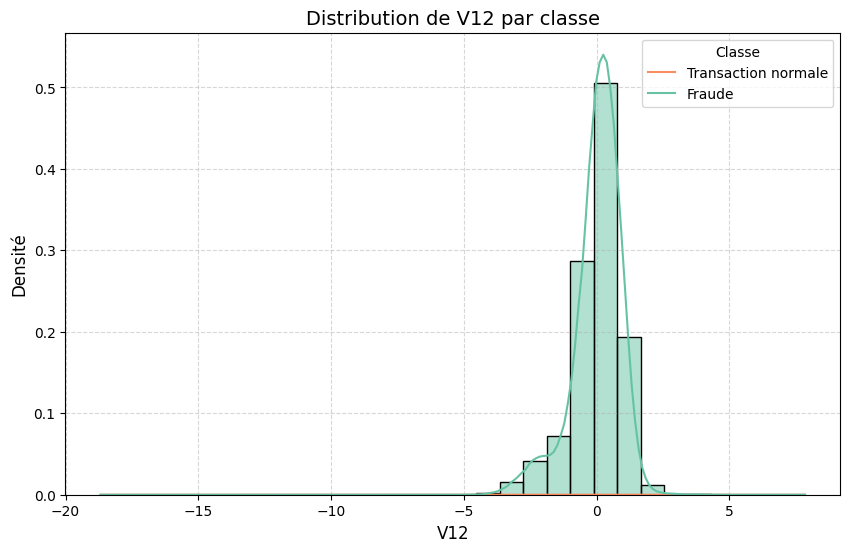

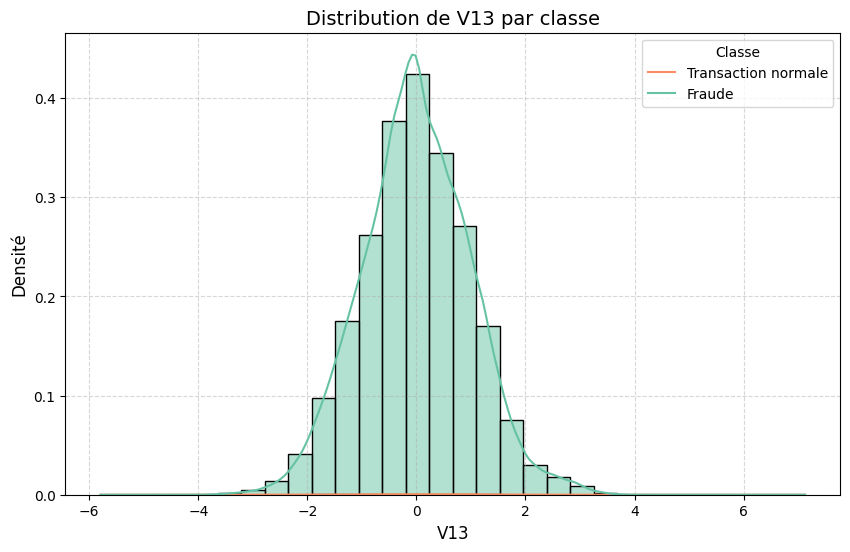

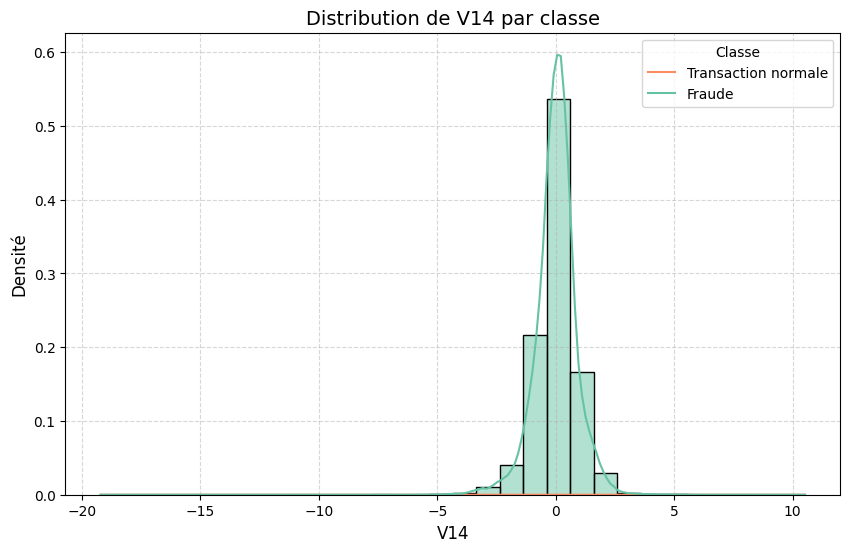

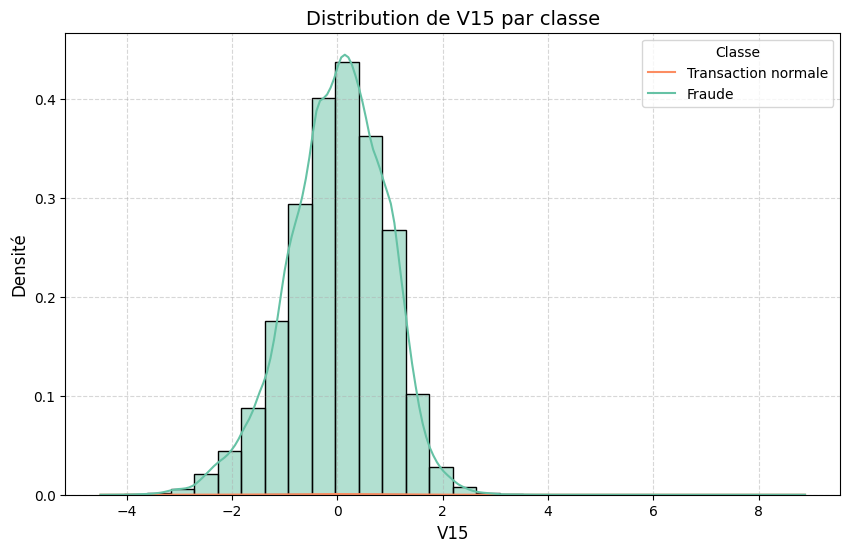

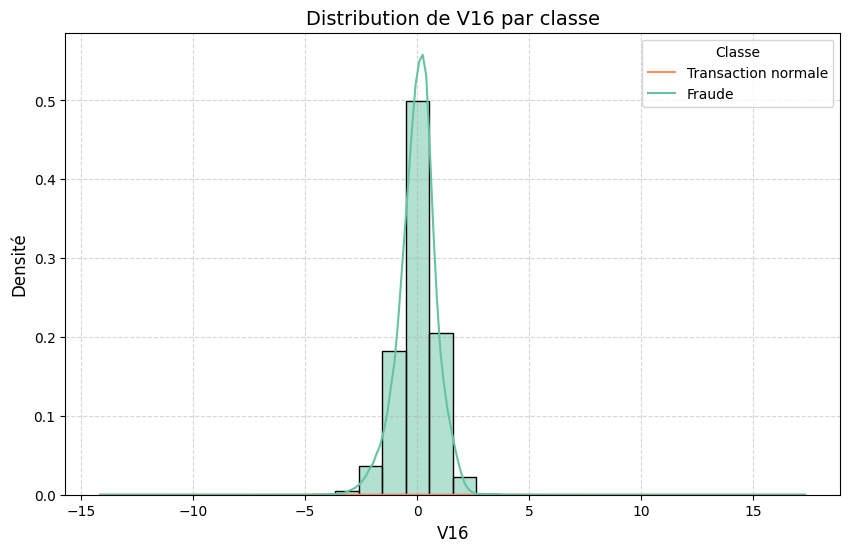

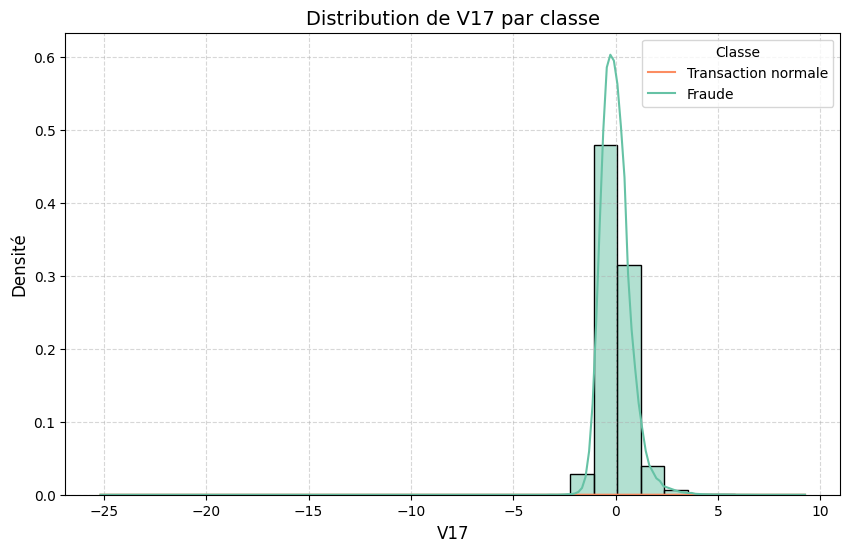

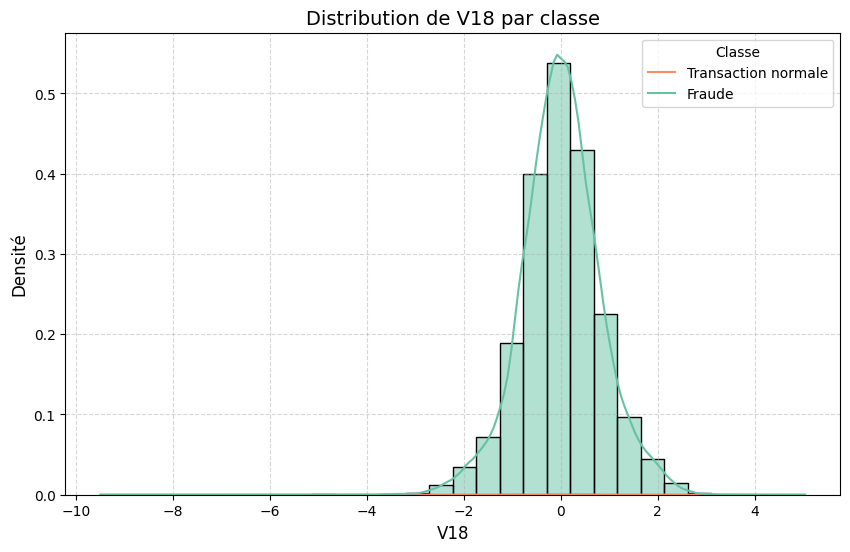

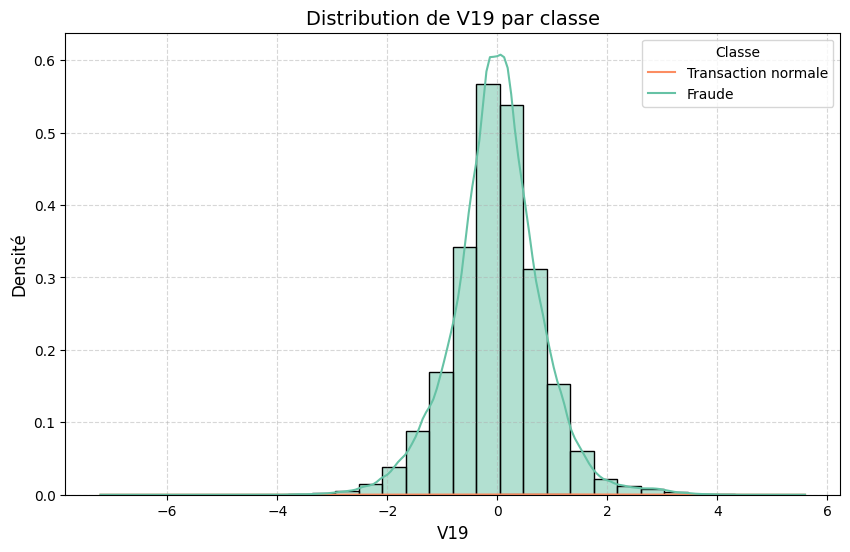

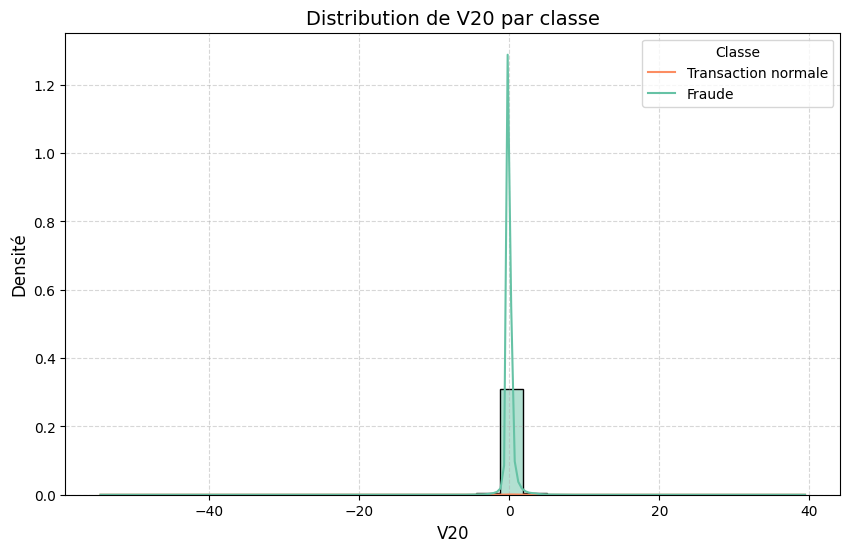

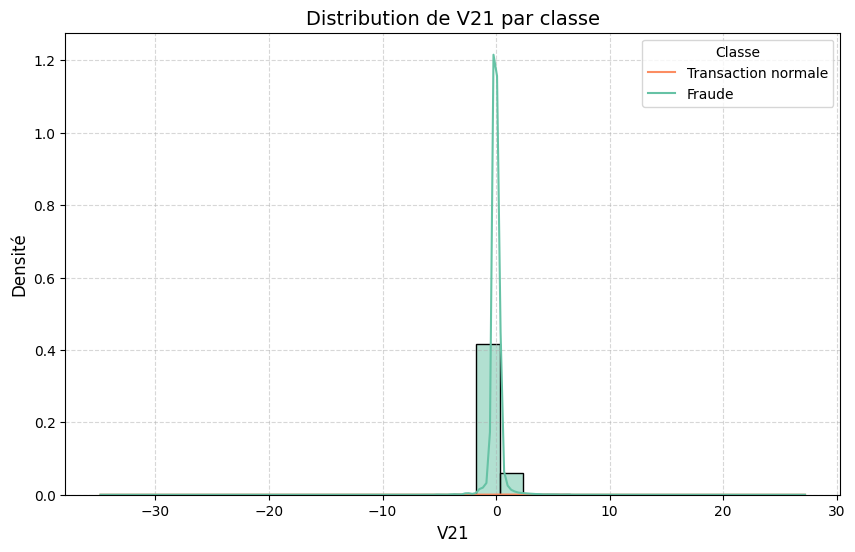

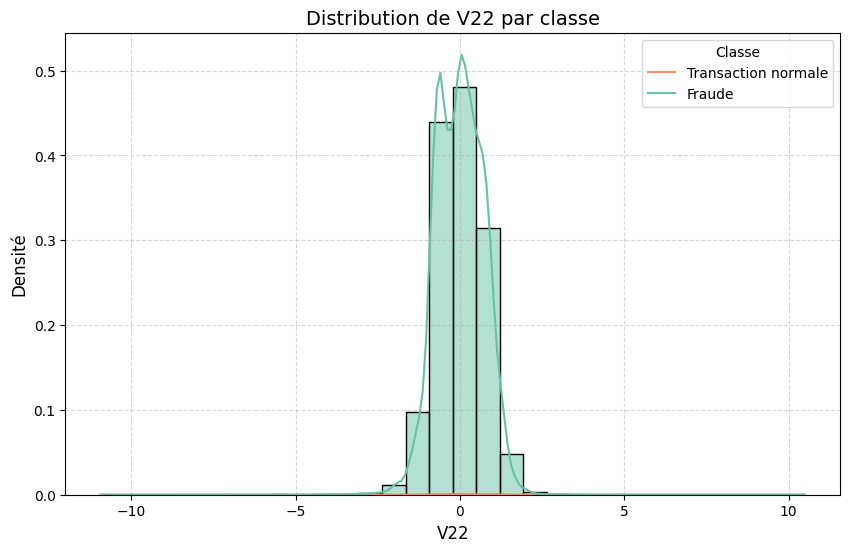

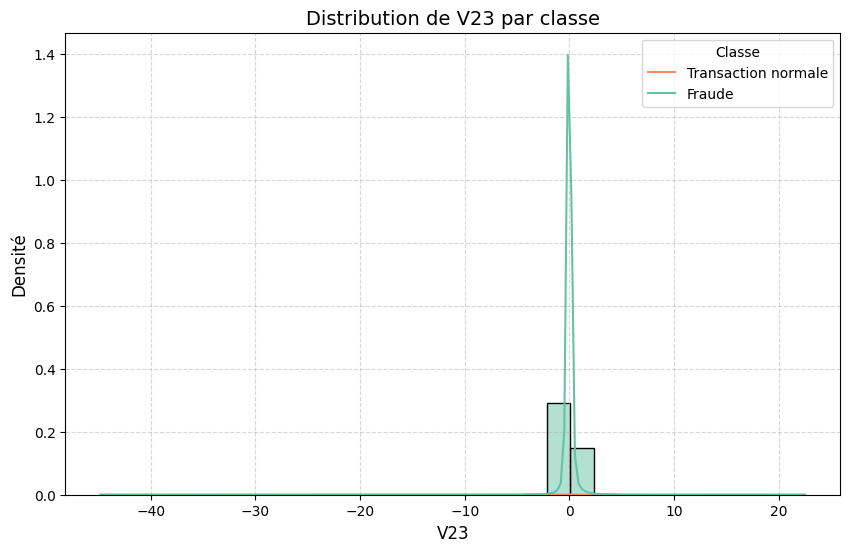

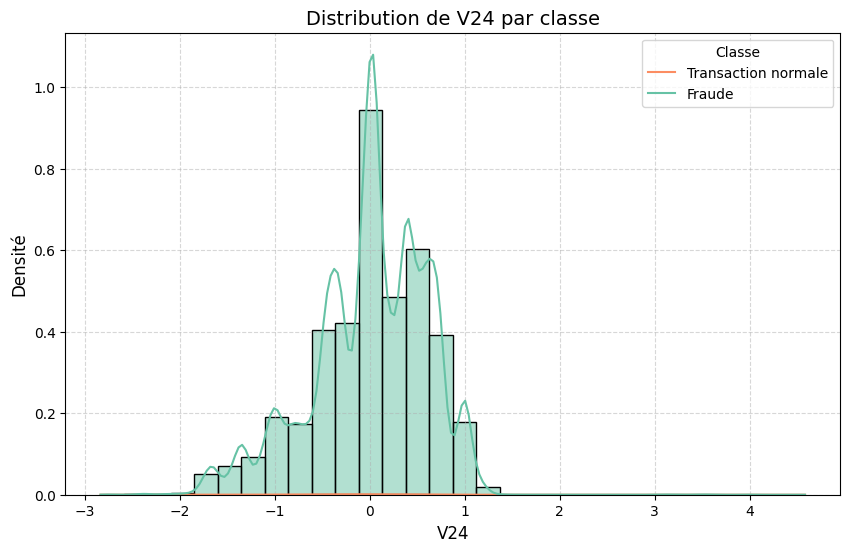

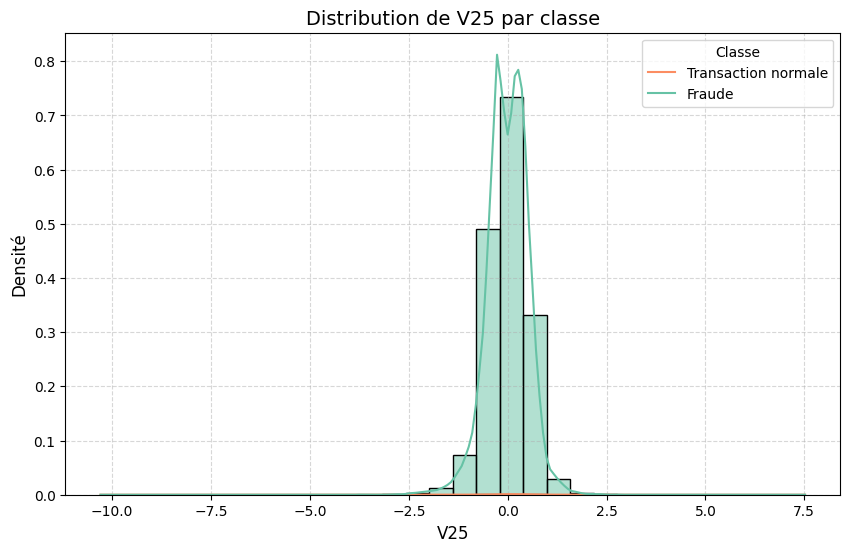

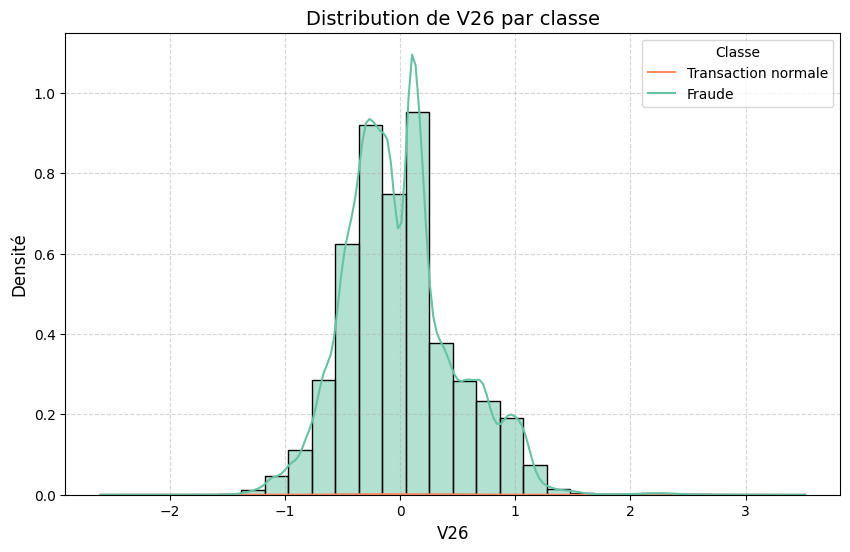

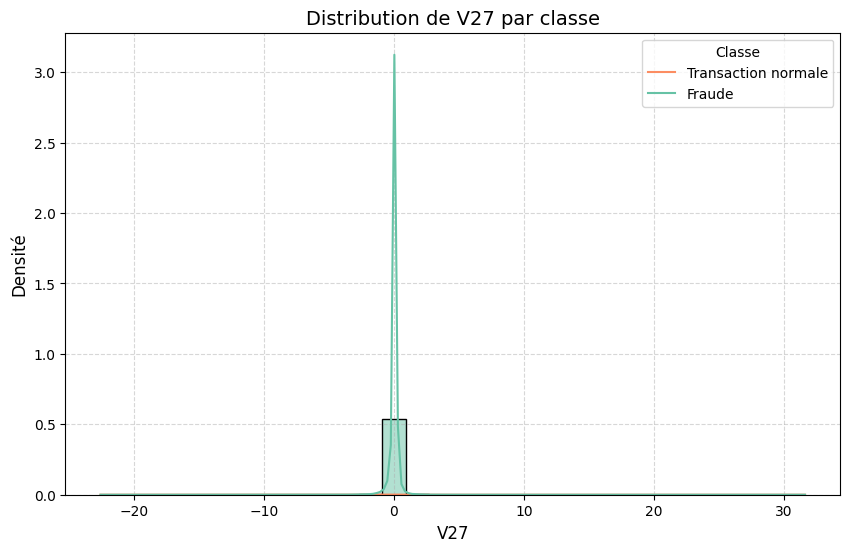

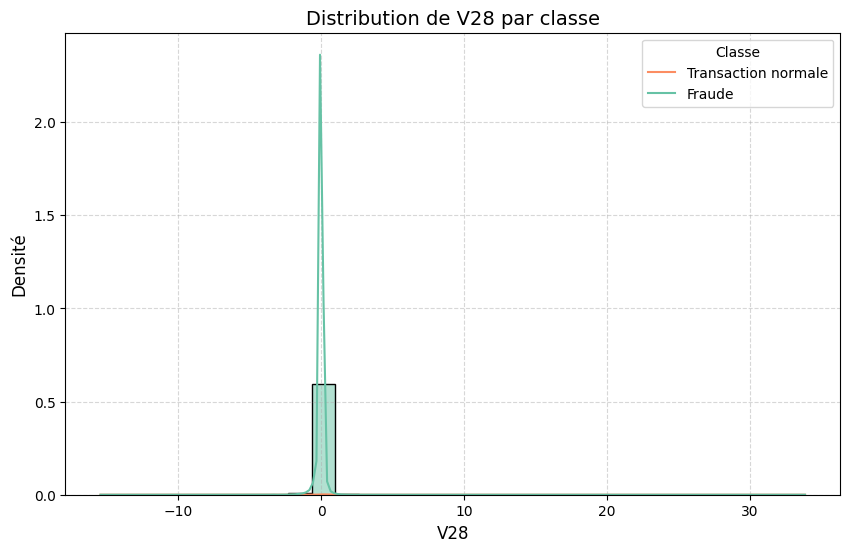

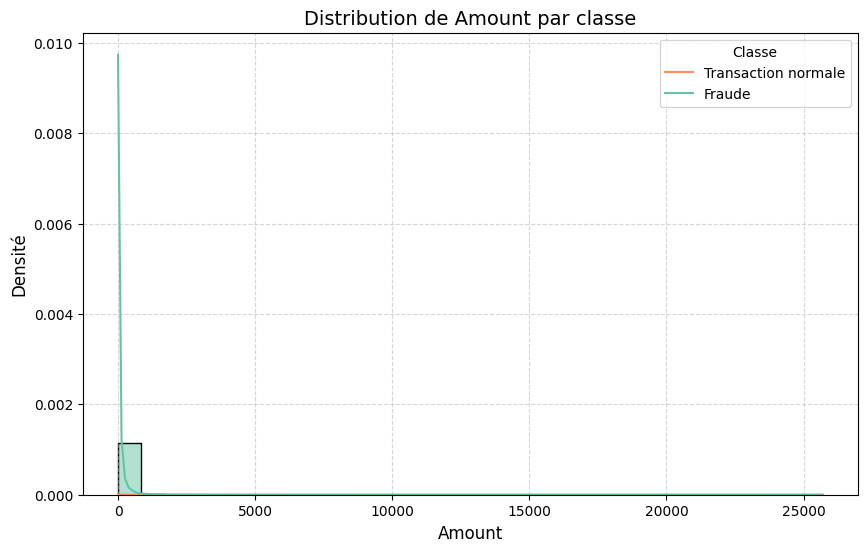

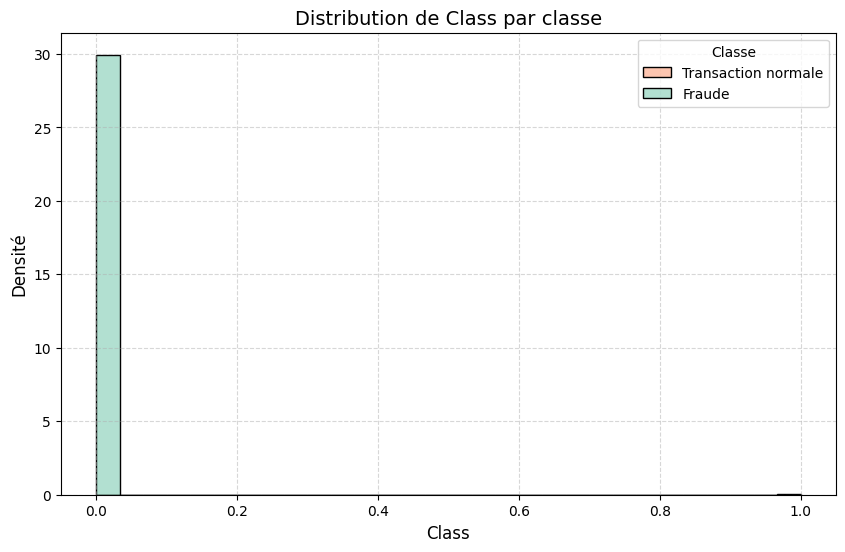

In [ ]:
for col in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='Class', bins=30, kde=True, palette='Set2', stat="density")
    plt.title(f'Distribution de {col} par classe', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Densité', fontsize=12)
    plt.legend(title='Classe', labels=['Transaction normale', 'Fraude'])
    plt.grid(alpha=0.5, linestyle='--')
    plt.show()

Ce graphique montre la distribution de chaque variable  pour les deux classes :

- Classe 0 : Transactions normales (en orange, difficile à voir car peu présentes).
- Classe 1 : Transactions frauduleuses (en vert)





Nous constatons que les variables ne suivent pas une distribution normale.

In [ ]:
class_0 = df[df['Class']==0]["Time"]
class_1 = df[df['Class']==1]["Time"]

hist_df = [class_0,class_1]
group_labels = ['Not fraud', 'Fraud']

fig = ff.create_distplot(hist_df, group_labels, bin_size=.2, show_hist=False, show_rug=False)
fig.update_layout(title_text='Densité des transactions par heure', xaxis = dict(title = 'Time [s]'))
fig.show()

Les transactions frauduleuses ont une répartition plus uniforme que les transactions valides : elles sont réparties de manière égale dans le temps, y compris pendant les périodes de faible activité des transactions réelles, comme la nuit en Europe.

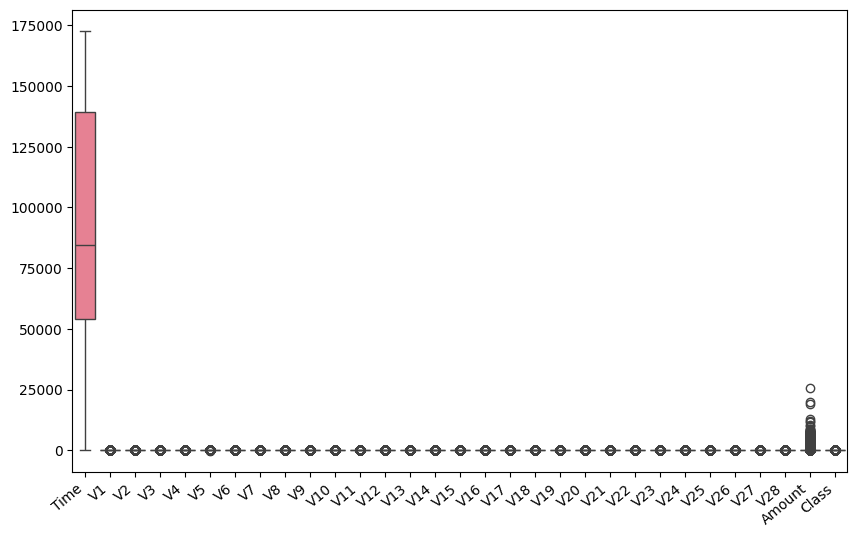

In [ ]:
plt.figure(figsize=(10, 6))
g = sns.boxplot(data=df)
g.set_xticks(g.get_xticks())
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.show()

La variable Time a une large distribution et nécessite une normalisation pour éviter qu'elle ne domine les autres. Les variables techniques (V1 à V28) sont bien réparties avec peu d'outliers. Amount présente des valeurs faibles majoritaires mais des outliers significatifs, nécessitant une gestion spécifique. La variable Class est déséquilibrée (fraude vs normale), ce qui nécessite un rééquilibrage pour améliorer la détection de fraude. En conclusion, une normalisation (Time, Amount) et un rééquilibrage des classes (Class) sont indispensable pour optimiser les modèles.

In [7]:
x=df.drop(columns='Class')
y=df['Class']

In [8]:
df['Class'].value_counts()

,count
Class,
0,283253
1,473


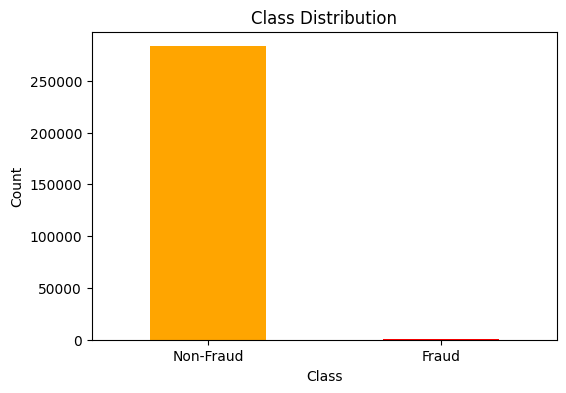

In [9]:
class_counts = y.value_counts()
class_labels = ['Non-Fraud', 'Fraud']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['orange', 'red'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()

Il y a 283 253 transactions légitimes et seulement 473 transactions frauduleuses. Ce déséquilibre marqué dans les données reflète une proportion bien plus élevée de transactions non frauduleuses par rapport aux transactions frauduleuses.

# III - Classification sans balancement des données

In [10]:
#partager des données éch.test = 30%
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
#standardiser les donnees
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

(198608, 30) (85118, 30) (198608,) (85118,)


In [11]:
list_accuracies=[]
list_precisions=[]
list_recalls=[]
list_F1=[]

## 1 - Régression logistique

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy : 0.9991658638595832
Precision : 0.8987341772151899
Recall : 0.5298507462686567
F1 Score : 0.6666666666666666


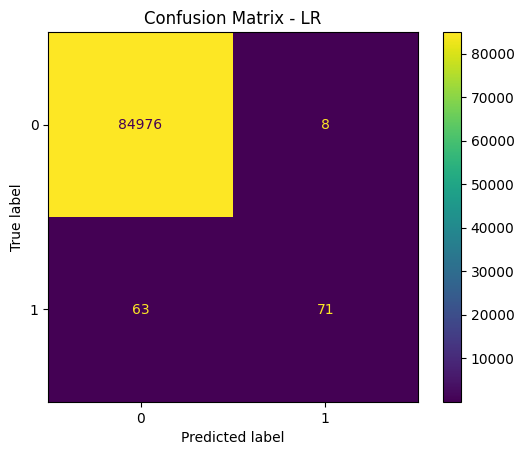

In [12]:
lg_clf = LogisticRegression(solver='sag')

# Entraînement du modèle
lg_clf.fit(x_train, y_train)


# Prédictions sur le jeu de test
res_lg = lg_clf.predict(x_test)

# Calcul des métriques
acc_lg = accuracy_score(y_test, res_lg)
F1_lg = f1_score(y_test, res_lg)
precision_lg = precision_score(y_test, res_lg)
recall_lg = recall_score(y_test, res_lg)

# Affichage des métriques
print("Accuracy :", acc_lg)
print("Precision :", precision_lg)
print("Recall :", recall_lg)
print("F1 Score :", F1_lg)


# Stockage des résultats
list_accuracies.append(acc_lg)
list_precisions.append(precision_lg)
list_recalls.append(recall_lg)
list_F1.append(F1_lg)

# Matrice de confusion
cm = confusion_matrix(y_test, res_lg, labels=lg_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_clf.classes_)
disp.plot()
plt.title("Confusion Matrix - LR")
plt.show()

## 2 - KNN

Accuracy : 0.9994948189572124
Precision : 0.9333333333333333
Recall : 0.7313432835820896
F1 Score : 0.8200836820083682


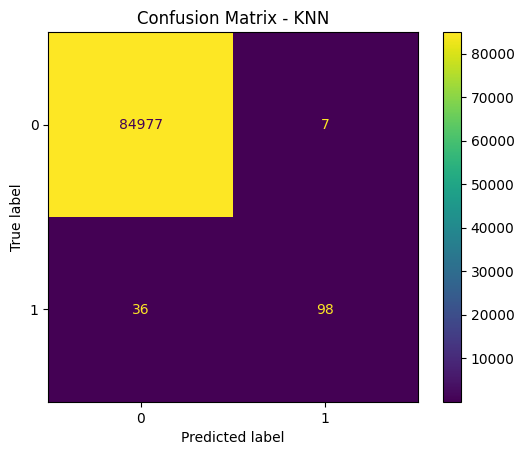

In [13]:
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Entraînement
knn_clf.fit(x_train, y_train)

# Prédictions
res_knn = knn_clf.predict(x_test)

# Calcul des métriques
acc_knn = accuracy_score(y_test, res_knn)
F1_knn = f1_score(y_test, res_knn)
precision_knn = precision_score(y_test, res_knn)
recall_knn = recall_score(y_test, res_knn)

# Affichage des métriques
print("Accuracy :", acc_knn)
print("Precision :", precision_knn)
print("Recall :", recall_knn)
print("F1 Score :", F1_knn)

# Stockage des résultats
list_accuracies.append(acc_knn)
list_precisions.append(precision_knn)
list_recalls.append(recall_knn)
list_F1.append(F1_knn)

# Matrice de confusion
cm = confusion_matrix(y_test, res_knn, labels=knn_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf.classes_)
disp.plot()
plt.title("Confusion Matrix - KNN")
plt.show()

## 3 - Arbres de décision

Accuracy : 0.9991658638595832
F1 Score : 0.7455197132616488
Precision : 0.7172413793103448
Recall : 0.7761194029850746


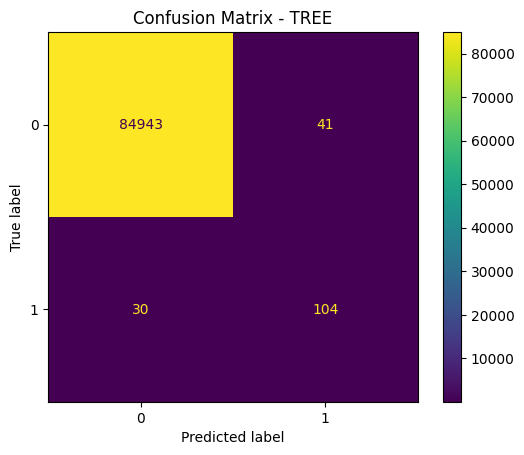

In [14]:
tree_clf = DecisionTreeClassifier()

# Entraînement
tree_clf.fit(x_train, y_train)


# Prédictions
res_tree = tree_clf.predict(x_test)


# Calcul des métriques
acc_tree = accuracy_score(y_test, res_tree)
F1_tree = f1_score(y_test, res_tree)
precision_tree = precision_score(y_test, res_tree)
recall_tree = recall_score(y_test, res_tree)

# Affichage des métriques
print("Accuracy :", acc_tree)
print("F1 Score :", F1_tree)
print("Precision :", precision_tree)
print("Recall :", recall_tree)

# Stockage des résultats
list_accuracies.append(acc_tree)
list_precisions.append(precision_tree)
list_recalls.append(recall_tree)
list_F1.append(F1_tree)

# Matrice de confusion
cm = confusion_matrix(y_test, res_tree, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_ )
disp.plot()
plt.title("Confusion Matrix - TREE")
plt.show()

In [15]:
results = pd.DataFrame({'Accuracy': list_accuracies,
                        'Precision': list_precisions,
                        'Recall': list_recalls,
                        'F1 Score': list_F1})
results.index = ['LG', 'KNN', 'DT']
results

,Accuracy,Precision,Recall,F1 Score
LG,0.999166,0.898734,0.529851,0.666667
KNN,0.999495,0.933333,0.731343,0.820084
DT,0.999166,0.717241,0.776119,0.745520


Le KNN semble être le modèle le plus performant et équilibré pour ce problème spécifique. Si un modèle plus simple à interpréter est préféré, le DT peut être une alternative raisonnable avec un rappel élevé, mais sa précision relativement faible est un inconvénient. La régression logistique est moins adaptée ici en raison de son faible rappel.

# IV - Classification par les méthodes d'ensemble



## 1 - Random forest


Accuracy : 0.9995418125425879
Precision : 0.9439252336448598
Recall : 0.753731343283582
F1 Score : 0.8381742738589212


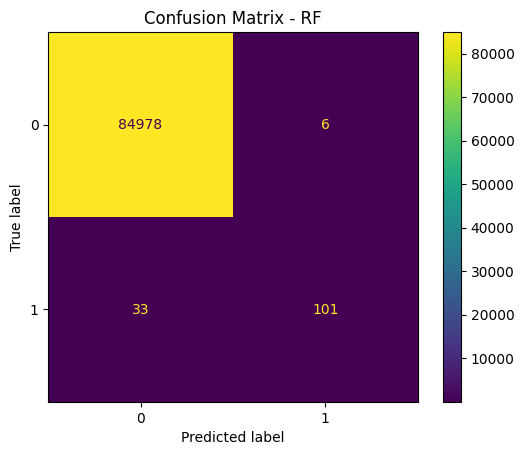

In [16]:
rf_clf = RandomForestClassifier(n_estimators=100, max_samples = 0.4, max_features = 0.8,  n_jobs=-1)

# Entraînement
rf_clf.fit(x_train, y_train)


# Prédictions
res_rf = rf_clf.predict(x_test)


# Calcul des métriques
acc_rf = accuracy_score(y_test, res_rf)
F1_rf = f1_score(y_test, res_rf)
precision_rf = precision_score(y_test, res_rf)
recall_rf = recall_score(y_test, res_rf)

# Affichage des métriques
print("Accuracy :", acc_rf)
print("Precision :", precision_rf)
print("Recall :", recall_rf)
print("F1 Score :", F1_rf)


# Stockage des résultats
list_accuracies.append(acc_rf)
list_precisions.append(precision_rf)
list_recalls.append(recall_rf)
list_F1.append(F1_rf)

# Matrice de confusion
cm = confusion_matrix(y_test, res_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - RF")
plt.show()

## 2 - Bagging avec Régression Logistique

Accuracy : 0.9991541154632393
Precision : 0.8875
Recall : 0.5298507462686567
F1 Score : 0.6635514018691588


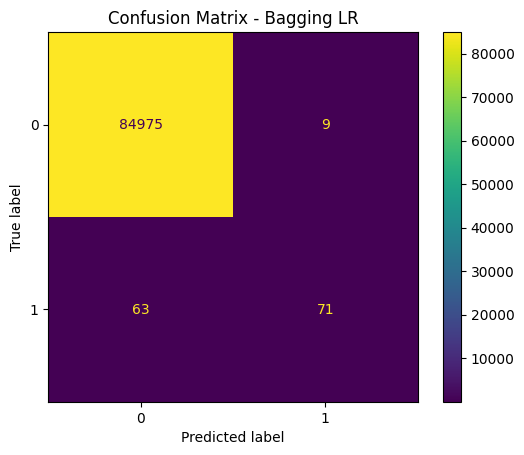

In [17]:
bagging_lr = BaggingClassifier(LogisticRegression(), n_estimators=100,  max_samples=0.1, bootstrap = True)

# Entraînement
bagging_lr.fit(x_train, y_train)


# Prédictions
res_bagging_lr = bagging_lr.predict(x_test)


# Calcul des métriques
acc_bagging_lr = accuracy_score(y_test, res_bagging_lr)
F1_bagging_lr = f1_score(y_test, res_bagging_lr)
precision_bagging_lr = precision_score(y_test, res_bagging_lr)
recall_bagging_lr = recall_score(y_test, res_bagging_lr)

# Affichage des métriques
print("Accuracy :", acc_bagging_lr)
print("Precision :", precision_bagging_lr)
print("Recall :", recall_bagging_lr)
print("F1 Score :", F1_bagging_lr)


# Stockage des résultats
list_accuracies.append(acc_bagging_lr)
list_precisions.append(precision_bagging_lr)
list_recalls.append(recall_bagging_lr)
list_F1.append(F1_bagging_lr)

# Matrice de confusion
cm = confusion_matrix(y_test, res_bagging_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Bagging LR")
plt.show()

## 3 - Extreme gradient boosting

Accuracy : 0.9995535609389319
Precision : 0.9444444444444444
Recall : 0.7611940298507462
F1 Score : 0.8429752066115702


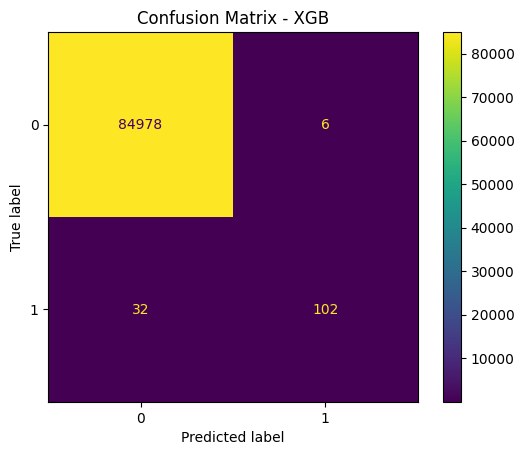

In [18]:
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric='logloss')

# Entraînement
xgb_clf.fit(x_train, y_train)

# Prédictions
res_xgb = xgb_clf.predict(x_test)


# Calcul des métriques
acc_xgb = accuracy_score(y_test, res_xgb)
F1_xgb = f1_score(y_test, res_xgb)
precision_xgb = precision_score(y_test, res_xgb)
recall_xgb = recall_score(y_test, res_xgb)

# Affichage des métriques
print("Accuracy :", acc_xgb)
print("Precision :", precision_xgb)
print("Recall :", recall_xgb)
print("F1 Score :", F1_xgb)


# Stockage des résultats
list_accuracies.append(acc_xgb)
list_precisions.append(precision_xgb)
list_recalls.append(recall_xgb)
list_F1.append(F1_xgb)

# Matrice de confusion
cm = confusion_matrix(y_test, res_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - XGB")
plt.show()

## Résultats des mèthodes d'ensemble

In [19]:
results = pd.DataFrame({'Accuracy': [acc_rf, acc_bagging_lr, acc_xgb],
                        'Precision':[precision_rf, precision_bagging_lr, precision_xgb],
                        'Recall': [recall_rf, recall_bagging_lr, recall_xgb],
                        'F1 Score': [F1_rf, F1_bagging_lr, F1_xgb]})
results.index = ['RF', 'Bagging_lg', 'XGB']
results

,Accuracy,Precision,Recall,F1 Score
RF,0.999542,0.943925,0.753731,0.838174
Bagging_lg,0.999154,0.887500,0.529851,0.663551
XGB,0.999554,0.944444,0.761194,0.842975


XGBoost est clairement le modèle le plus performant parmi les trois. Il offre un excellent compromis entre précision et rappel, avec un F1 Score élevé. Il est donc le meilleur choix pour la détection de fraude dans ce cas.
Random Forest est également un excellent modèle, offrant un bon équilibre entre les différentes métriques, et pourrait être une alternative solide à XGB.
Bagging_lg présente de bonnes performances globales en termes de précision, mais son faible rappel et F1 Score le rendent moins adapté pour une tâche de détection de fraude, où l'objectif est de maximiser la détection des fraudes (i.e., maximiser le rappel).


# IV - Balancement des données avec SMOTE et B-SMOTE

In [20]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [21]:
b_smote = BorderlineSMOTE(random_state=42)
x_train_bsmote, y_train_bsmote = b_smote.fit_resample(x_train, y_train)

# V - Classification des données balancées (au moins 2 techniques et 2 autres méthodes d'ensemble)

## A - Les methodes de classification classique avec des données balancées SMOTE

### 1 - Régression logistique

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy : 0.9757160647571607
Precision : 0.05563218390804598
Recall : 0.9029850746268657
F1 Score : 0.10480727587700303


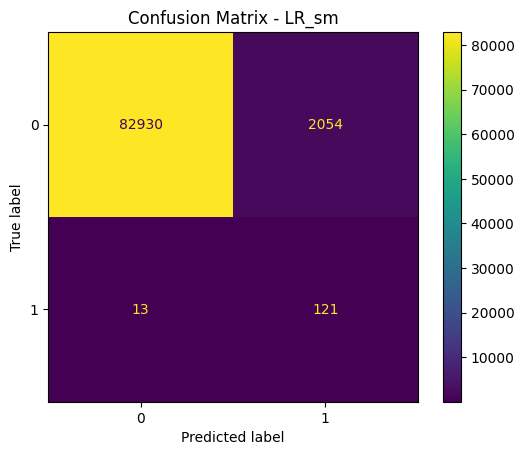

In [22]:
lg_clf_sm = LogisticRegression(solver='sag')

# Entraînement du modèle
lg_clf_sm.fit(x_train_smote, y_train_smote)


# Prédictions sur le jeu de test
res_lg_sm = lg_clf_sm.predict(x_test)

# Calcul des métriques
acc_lg_sm = accuracy_score(y_test, res_lg_sm )
F1_lg_sm = f1_score(y_test, res_lg_sm )
precision_lg_sm = precision_score(y_test, res_lg_sm )
recall_lg_sm = recall_score(y_test, res_lg_sm )

# Affichage des métriques
print("Accuracy :", acc_lg_sm)
print("Precision :", precision_lg_sm)
print("Recall :", recall_lg_sm)
print("F1 Score :", F1_lg_sm)


# Stockage des résultats
list_accuracies.append(acc_lg_sm)
list_precisions.append(precision_lg_sm)
list_recalls.append(recall_lg_sm)
list_F1.append(F1_lg_sm)

# Matrice de confusion
cm = confusion_matrix(y_test, res_lg_sm , labels=lg_clf_sm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_clf_sm.classes_)
disp.plot()
plt.title("Confusion Matrix - LR_sm")
plt.show()

### 2 - KNN

Accuracy : 0.9982377405484152
Precision : 0.46551724137931033
Recall : 0.8059701492537313
F1 Score : 0.5901639344262295


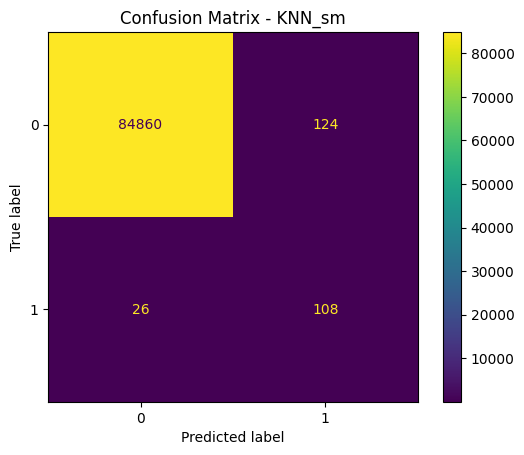

In [23]:
knn_clf_sm = KNeighborsClassifier(n_neighbors=5)
# Entraînement
knn_clf_sm.fit(x_train_smote, y_train_smote)

# Prédictions
res_knn_sm = knn_clf_sm.predict(x_test)

# Calcul des métriques
acc_knn_sm = accuracy_score(y_test, res_knn_sm)
F1_knn_sm = f1_score(y_test, res_knn_sm)
precision_knn_sm = precision_score(y_test, res_knn_sm)
recall_knn_sm = recall_score(y_test, res_knn_sm)

# Affichage des métriques
print("Accuracy :", acc_knn_sm)
print("Precision :", precision_knn_sm)
print("Recall :", recall_knn_sm)
print("F1 Score :", F1_knn_sm)

# Stockage des résultats
list_accuracies.append(acc_knn_sm)
list_precisions.append(precision_knn_sm)
list_recalls.append(recall_knn_sm)
list_F1.append(F1_knn_sm)

# Matrice de confusion
cm = confusion_matrix(y_test, res_knn_sm, labels=knn_clf_sm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf_sm.classes_)
disp.plot()
plt.title("Confusion Matrix - KNN_sm")
plt.show()


### 3 - Arbres de décision

Accuracy : 0.9976855659202519
Precision : 0.3862815884476534
Recall : 0.7985074626865671
F1 Score : 0.5206812652068127


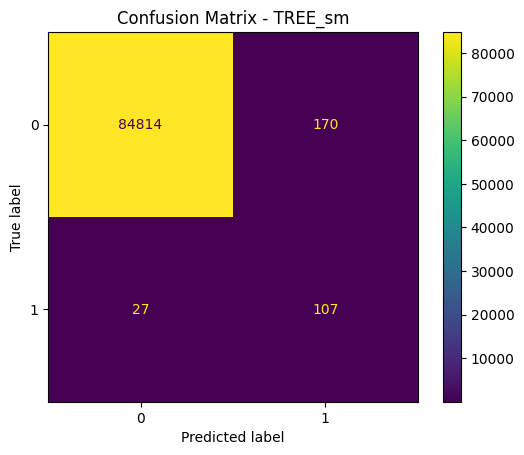

In [24]:
tree_clf = DecisionTreeClassifier()

# Entraînement
tree_clf.fit(x_train_smote, y_train_smote)


# Prédictions
res_tree = tree_clf.predict(x_test)


# Calcul des métriques
acc_tree_sm = accuracy_score(y_test, res_tree)
F1_tree_sm = f1_score(y_test, res_tree)
precision_tree_sm = precision_score(y_test, res_tree)
recall_tree_sm = recall_score(y_test, res_tree)

# Affichage des métriques
print("Accuracy :", acc_tree_sm)
print("Precision :", precision_tree_sm)
print("Recall :", recall_tree_sm)
print("F1 Score :", F1_tree_sm)


# Stockage des résultats
list_accuracies.append(acc_tree_sm)
list_precisions.append(precision_tree_sm)
list_recalls.append(recall_tree_sm)
list_F1.append(F1_tree_sm)

# Matrice de confusion
cm = confusion_matrix(y_test, res_tree, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_ )
disp.plot()
plt.title("Confusion Matrix - TREE_sm")
plt.show()

In [25]:
#performances des methodes
results = pd.DataFrame({'Accuracy': [acc_lg_sm, acc_knn_sm, acc_tree_sm],
                        'Precision':[precision_lg_sm, precision_knn_sm, precision_tree_sm],
                        'Recall': [recall_lg_sm, recall_knn_sm, recall_tree_sm],
                        'F1 Score': [F1_lg_sm, F1_knn_sm, F1_tree_sm]})
results.index = ['LG_sm', 'KNN_sm', 'TREE_sm']
results

,Accuracy,Precision,Recall,F1 Score
LG_sm,0.975716,0.055632,0.902985,0.104807
KNN_sm,0.998238,0.465517,0.805970,0.590164
TREE_sm,0.997686,0.386282,0.798507,0.520681


KNN_sm semble être le meilleur modèle parmi ceux-ci, avec un bon compromis entre précision et rappel. Son F1 Score modéré montre qu'il offre des performances relativement équilibrées, même s'il pourrait être encore amélioré.
TREE_sm est également performant, mais légèrement moins bon que KNN_sm.
LG_sm offre un excellent recall, mais le très faible precision et le F1 Score très bas suggèrent qu'il est trop agressif dans la détection des fraudes, générant trop de faux positifs.

## B - Les mèthodes d'ensemble avec SMOTE

### 1 - Voting classifier

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy : 0.9961347776028572
Precision : 0.26618705035971224
Recall : 0.8283582089552238
F1 Score : 0.4029038112522686


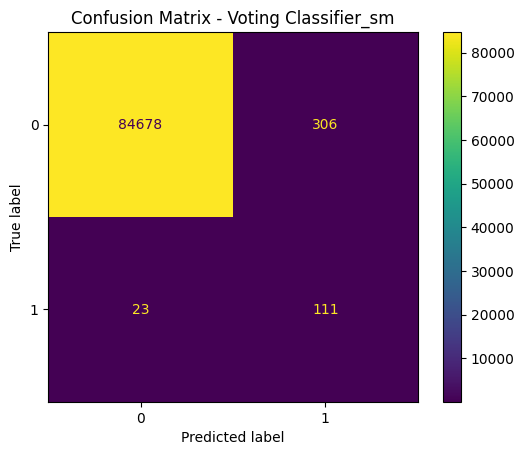

In [26]:
# Définir les modèles individuels
lr = LogisticRegression(solver='saga', max_iter=1000)  # Régression logistique
knn = KNeighborsClassifier(n_neighbors=5)  # KNN
nb = GaussianNB()  # Modèle Naive Bayes

# Classifieur de vote
voting_clf = VotingClassifier(estimators=[
    ('LR', lr),
    ('KNN', knn),
    ('NaiveBayes', nb)
], voting='hard')

# Entraînement du modèle VotingClassifier sur les données équilibrées avec SMOTE
voting_clf.fit(x_train_smote, y_train_smote)

# Prédictions
res_voting = voting_clf.predict(x_test)

# Calcul des métriques
acc_voting_sm = accuracy_score(y_test, res_voting)
F1_voting_sm = f1_score(y_test, res_voting)
precision_voting_sm = precision_score(y_test, res_voting)
recall_voting_sm = recall_score(y_test, res_voting)

# Affichage des métriques
print("Accuracy :", acc_voting_sm)
print("Precision :", precision_voting_sm)
print("Recall :", recall_voting_sm)
print("F1 Score :", F1_voting_sm)

# Stockage des résultats
list_accuracies.append(acc_voting_sm)
list_precisions.append(precision_voting_sm)
list_recalls.append(recall_voting_sm)
list_F1.append(F1_voting_sm)


# Matrice de confusion
cm = confusion_matrix(y_test, res_voting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Voting Classifier_sm")
plt.show()



### 2 - Adaboost

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy : 0.9789116285627012
Precision : 0.06220347917764892
Recall : 0.8805970149253731
F1 Score : 0.11619891678975874


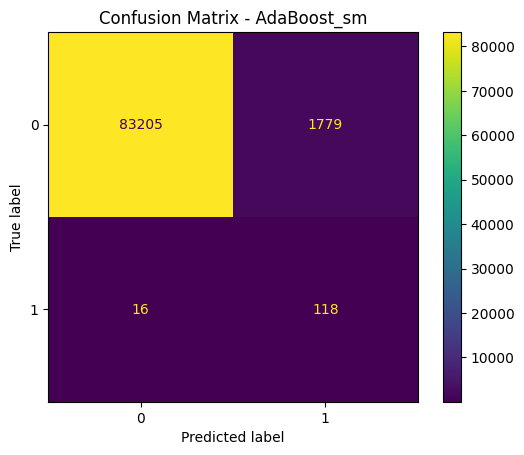

In [27]:
# Modèle AdaBoost avec un arbre de décision comme classificateur de base
adaboost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0
)

# Entraînement sur les données équilibrées (SMOTE)
adaboost_clf.fit(x_train_smote, y_train_smote)

# Prédictions
res_adaboost = adaboost_clf.predict(x_test)

# Calcul des métriques
acc_adaboost_sm = accuracy_score(y_test, res_adaboost)
F1_adaboost_sm = f1_score(y_test, res_adaboost)
precision_adaboost_sm = precision_score(y_test, res_adaboost)
recall_adaboost_sm = recall_score(y_test, res_adaboost)

# Affichage des métriques
print("Accuracy :", acc_adaboost_sm)
print("Precision :", precision_adaboost_sm)
print("Recall :", recall_adaboost_sm)
print("F1 Score :", F1_adaboost_sm)


# Stockage des résultats
list_accuracies.append(acc_adaboost_sm)
list_precisions.append(precision_adaboost_sm)
list_recalls.append(recall_adaboost_sm)
list_F1.append(F1_adaboost_sm)

# Matrice de confusion
cm = confusion_matrix(y_test, res_adaboost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - AdaBoost_sm")
plt.show()

### 3 - Stacking

Accuracy : 0.9696656406400527
Precision : 0.04498141263940521
Recall : 0.9029850746268657
F1 Score : 0.08569405099150142


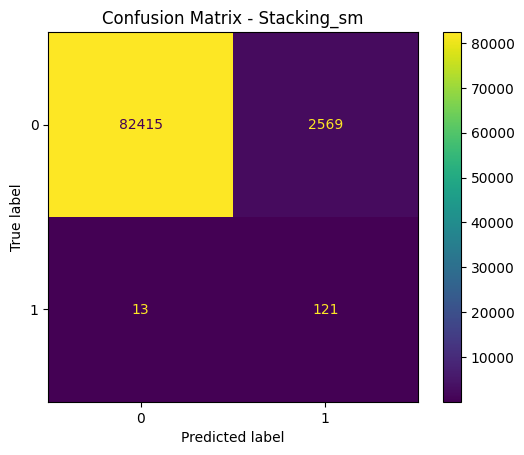

In [28]:
#Définir les modèles de base (base learners)
base_learners = [
    ('lr', LogisticRegression(solver='sag', random_state=42)),  # Logistic Regression
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=42))  # Decision Tree
]

#Méta-modèle (final estimator)
meta_model = LogisticRegression(solver='sag', random_state=42)

#StackingClassifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    n_jobs=-1  # Parallélisation
)

#Entraînement
stacking_clf.fit(x_train_smote, y_train_smote)

#Prédictions
y_pred = stacking_clf.predict(x_test)

#Calcul des métriques
acc_stacking_sm = accuracy_score(y_test, y_pred)
F1_stacking_sm = f1_score(y_test, y_pred)
precision_stacking_sm = precision_score(y_test, y_pred)
recall_stacking_sm = recall_score(y_test, y_pred)

#Affichage des métriques
print("Accuracy :", acc_stacking_sm)
print("Precision :", precision_stacking_sm)
print("Recall :", recall_stacking_sm)
print("F1 Score :", F1_stacking_sm)


# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Stacking_sm")
plt.show()

Le **stacking** est une méthode d'apprentissage d'ensemble qui combine plusieurs modèles de base (comme la régression logistique et l'arbre de décision) pour améliorer la performance globale. Les prédictions des modèles de base sont utilisées comme entrées pour un méta-modèle, qui apprend à combiner ces prédictions de manière optimale. L'objectif du stacking est d'obtenir de meilleures performances qu'un seul modèle en tirant parti de la diversité des base learners.

In [29]:
#performances des methodes d'ensemble avec SMOTE
results = pd.DataFrame({'Accuracy': [acc_voting_sm, acc_adaboost_sm, acc_stacking_sm],
                        'Precision':[precision_voting_sm, precision_adaboost_sm, precision_stacking_sm],
                        'Recall': [recall_voting_sm, recall_adaboost_sm, recall_stacking_sm],
                        'F1 Score': [F1_voting_sm, F1_adaboost_sm, F1_stacking_sm]})
results.index = ['Voting_sm', 'Adaboost_sm', 'Stacking_sm']
results

,Accuracy,Precision,Recall,F1 Score
Voting_sm,0.996135,0.266187,0.828358,0.402904
Adaboost_sm,0.978912,0.062203,0.880597,0.116199
Stacking_sm,0.969666,0.044981,0.902985,0.085694


Voting_sm semble être le modèle le plus équilibré parmi les trois, offrant un bon recall et un F1 Score plus raisonnable que les autres modèles d'apprentissage d'ensemble. Cependant, sa faible precision limite son efficacité.

Adaboost_sm et Stacking_sm montrent un excellent recall, mais leur très faible precision entraîne un très faible F1 Score, ce qui les rend moins adaptés à la détection de fraudes dans des scénarios où les faux positifs doivent être minimisés.

En somme, bien que ces modèles puissent être efficaces pour détecter un grand nombre de fraudes, leur faible precision les rend moins fiables dans un contexte de détection de fraude, où les faux positifs doivent être évités autant que possible.

Par conséquent, Voting_sm semble être le modèle le plus approprié parmi ces trois, mais il pourrait bénéficier d'une amélioration de la precision pour éviter les faux positifs.

## C - Modèles de classification classique avec B-SMOTE

### 1 - Régression logistique

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy : 0.9919758452971169
Precision : 0.1448900388098318
Recall : 0.835820895522388
F1 Score : 0.24696802646085997


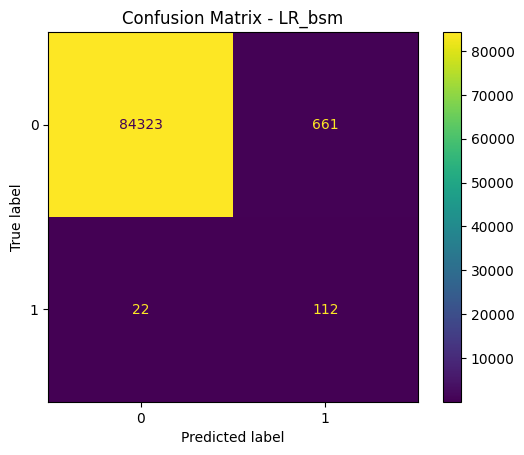

In [30]:
lg_clf_bsm = LogisticRegression(solver='sag')

#Entraînement du modèle
lg_clf_bsm.fit(x_train_bsmote, y_train_bsmote)


# Prédictions sur le jeu de test
res_lg_bsm = lg_clf_bsm.predict(x_test)

# Calcul des métriques
acc_lg_bsm = accuracy_score(y_test, res_lg_bsm )
F1_lg_bsm = f1_score(y_test, res_lg_bsm )
precision_lg_bsm = precision_score(y_test, res_lg_bsm )
recall_lg_bsm = recall_score(y_test, res_lg_bsm )

# Affichage des métriques
print("Accuracy :", acc_lg_bsm)
print("Precision :", precision_lg_bsm)
print("Recall :", recall_lg_bsm)
print("F1 Score :", F1_lg_bsm)


# Stockage des résultats
list_accuracies.append(acc_lg_bsm)
list_precisions.append(precision_lg_bsm)
list_recalls.append(recall_lg_bsm)
list_F1.append(F1_lg_bsm)

# Matrice de confusion
cm = confusion_matrix(y_test, res_lg_bsm , labels=lg_clf_bsm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_clf_bsm.classes_)
disp.plot()
plt.title("Confusion Matrix - LR_bsm")
plt.show()

### 2 - KNN


Accuracy : 0.9991893606522709
Precision : 0.7241379310344828
Recall : 0.7835820895522388
F1 Score : 0.7526881720430108


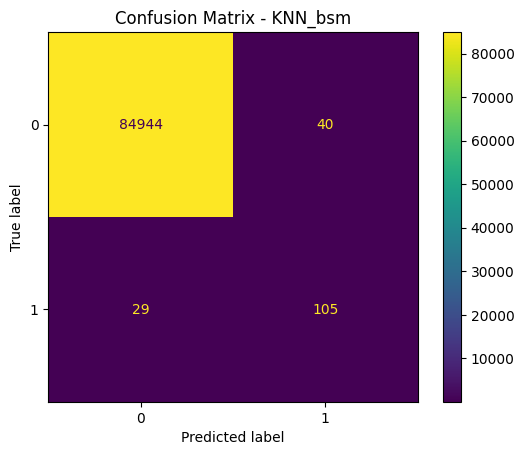

In [31]:
knn_clf_bsm = KNeighborsClassifier(n_neighbors=5)

# Entraînement
knn_clf_bsm.fit(x_train_bsmote, y_train_bsmote)

# Prédictions
res_knn_bsm = knn_clf_bsm.predict(x_test)

# Calcul des métriques
acc_knn_bsm = accuracy_score(y_test, res_knn_bsm)
F1_knn_bsm = f1_score(y_test, res_knn_bsm)
precision_knn_bsm = precision_score(y_test, res_knn_bsm)
recall_knn_bsm = recall_score(y_test, res_knn_bsm)

# Affichage des métriques
print("Accuracy :", acc_knn_bsm)
print("Precision :", precision_knn_bsm)
print("Recall :", recall_knn_bsm)
print("F1 Score :", F1_knn_bsm)

# Stockage des résultats
list_accuracies.append(acc_knn_bsm)
list_precisions.append(precision_knn_bsm)
list_recalls.append(recall_knn_bsm)
list_F1.append(F1_knn_bsm)

# Matrice de confusion
cm = confusion_matrix(y_test, res_knn_bsm, labels=knn_clf_bsm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf_bsm.classes_)
disp.plot()
plt.title("Confusion Matrix - KNN_bsm")
plt.show()

### 3 - Arbres de décision

Accuracy : 0.9989661411217369
F1 Score : 0.6788321167883211
Precision : 0.6642857142857143
Recall : 0.6940298507462687


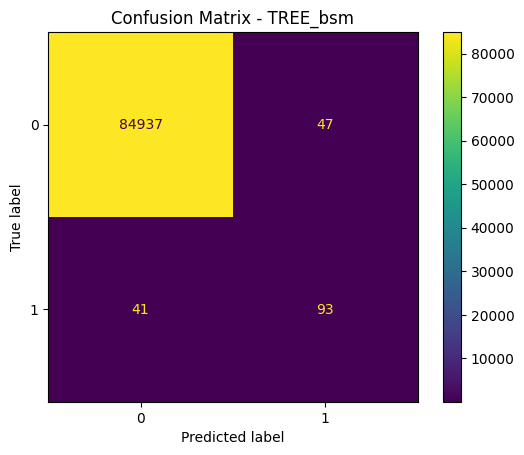

In [32]:
tree_clf = DecisionTreeClassifier()

# Entraînement
tree_clf.fit(x_train_bsmote, y_train_bsmote)


# Prédictions
res_tree = tree_clf.predict(x_test)


# Calcul des métriques
acc_tree_bsm = accuracy_score(y_test, res_tree)
F1_tree_bsm = f1_score(y_test, res_tree)
precision_tree_bsm = precision_score(y_test, res_tree)
recall_tree_bsm = recall_score(y_test, res_tree)

# Affichage des métriques
print("Accuracy :", acc_tree_bsm)
print("F1 Score :", F1_tree_bsm)
print("Precision :", precision_tree_bsm)
print("Recall :", recall_tree_bsm)

# Stockage des résultats
list_accuracies.append(acc_tree_bsm)
list_precisions.append(precision_tree_bsm)
list_recalls.append(recall_tree_bsm)
list_F1.append(F1_tree_bsm)

# Matrice de confusion
cm = confusion_matrix(y_test, res_tree, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_ )
disp.plot()
plt.title("Confusion Matrix - TREE_bsm")
plt.show()

In [33]:
#performances des methodes classique avec BSMOTE
results = pd.DataFrame({'Accuracy': [acc_lg_bsm, acc_knn_bsm, acc_tree_bsm],
                        'Precision':[precision_lg_bsm, precision_knn_bsm, precision_tree_bsm],
                        'Recall': [recall_lg_bsm, recall_knn_bsm, recall_tree_bsm],
                        'F1 Score': [F1_lg_bsm, F1_knn_bsm, F1_tree_bsm]})
results.index = ['LR_bsm', 'KNN_bsm', 'TREE_bsm']
results

,Accuracy,Precision,Recall,F1 Score
LR_bsm,0.991976,0.144890,0.835821,0.246968
KNN_bsm,0.999189,0.724138,0.783582,0.752688
TREE_bsm,0.998966,0.664286,0.694030,0.678832


KNN_bsm est le modèle le plus équilibré parmi ceux-ci, avec un bon compromis entre precision et recall, ainsi qu'un F1 Score élevé, ce qui en fait le meilleur choix parmi les modèles classiques avec balancement BSMOTE.

TREE_bsm offre également de bonnes performances avec un F1 Score solide, mais légèrement inférieur à celui de KNN_bsm.

LR_bsm, bien qu'ayant un excellent recall, a une precision très faible, ce qui conduit à un F1 Score très faible. Ce modèle est moins performant en raison de son grand nombre de faux positifs.

En résumé, KNN_bsm semble être le modèle le plus adapté pour la détection de fraude, avec un bon compromis entre precision, recall et F1 Score.


## D - Modèles de classification d'ensemble avec B-SMOTE

### 1 - Voting classifier

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy : 0.9983317277191663
Precision : 0.4824561403508772
Recall : 0.8208955223880597
F1 Score : 0.6077348066298343


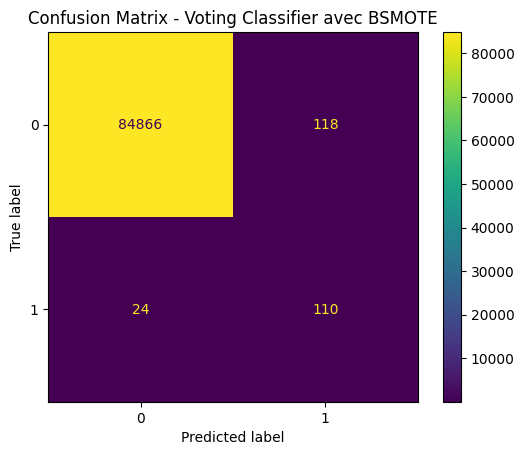

In [34]:
# Définir les modèles individuels
lr = LogisticRegression(solver='saga', max_iter=1000)  # Régression logistique
knn = KNeighborsClassifier(n_neighbors=5)  # KNN
nb = GaussianNB()  # Modèle Naive Bayes

# Classifieur de vote
voting_clf = VotingClassifier(estimators=[
    ('LR', lr),
    ('KNN', knn),
    ('NaiveBayes', nb)
], voting='hard')  # 'hard' pour voter basé sur les classes majoritaires

# Entraînement du modèle VotingClassifier sur les données équilibrées avec SMOTE
voting_clf.fit(x_train_bsmote, y_train_bsmote)

# Prédictions
res_voting = voting_clf.predict(x_test)

# Calcul des métriques
acc_voting_bsm = accuracy_score(y_test, res_voting)
F1_voting_bsm = f1_score(y_test, res_voting)
precision_voting_bsm  = precision_score(y_test, res_voting)
recall_voting_bsm  = recall_score(y_test, res_voting)

# Affichage des métriques
print("Accuracy :", acc_voting_bsm )
print("Precision :", precision_voting_bsm )
print("Recall :", recall_voting_bsm )
print("F1 Score :", F1_voting_bsm )

# Stockage des résultats
list_accuracies.append(acc_voting_bsm )
list_precisions.append(precision_voting_bsm )
list_recalls.append(recall_voting_bsm )
list_F1.append(F1_voting_bsm)


# Matrice de confusion
cm = confusion_matrix(y_test, res_voting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Voting Classifier avec BSMOTE")
plt.show()

### 2 - Adaboost

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy : 0.9948189572123405
Precision : 0.20761904761904762
Recall : 0.8134328358208955
F1 Score : 0.330804248861912


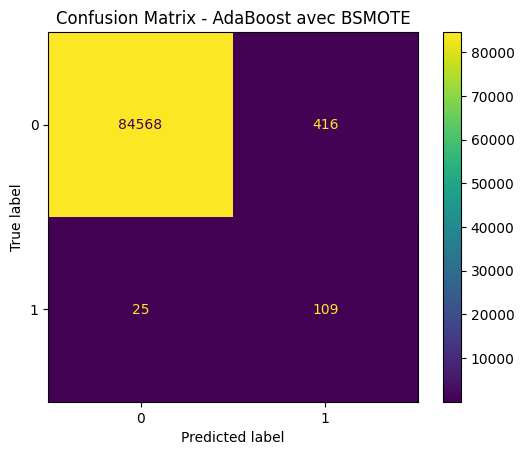

In [35]:
# Modèle AdaBoost avec un arbre de décision comme classificateur de base
adaboost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Arbre de décision peu profond (stump)
    n_estimators=50,  # Nombre de stumps
    learning_rate=1.0  # Taux d'apprentissage
)

# Entraînement sur les données équilibrées (SMOTE)
adaboost_clf.fit(x_train_bsmote, y_train_bsmote)

# Prédictions
res_adaboost = adaboost_clf.predict(x_test)

# Calcul des métriques
acc_adaboost_bsm = accuracy_score(y_test, res_adaboost)
F1_adaboost_bsm = f1_score(y_test, res_adaboost)
precision_adaboost_bsm = precision_score(y_test, res_adaboost)
recall_adaboost_bsm = recall_score(y_test, res_adaboost)

# Affichage des métriques
print("Accuracy :", acc_adaboost_bsm)
print("Precision :", precision_adaboost_bsm)
print("Recall :", recall_adaboost_bsm)
print("F1 Score :", F1_adaboost_bsm)


# Stockage des résultats
list_accuracies.append(acc_adaboost_bsm)
list_precisions.append(precision_adaboost_bsm)
list_recalls.append(recall_adaboost_bsm)
list_F1.append(F1_adaboost_bsm)

# Matrice de confusion
cm = confusion_matrix(y_test, res_adaboost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - AdaBoost avec BSMOTE")
plt.show()

### 3 - Stacking avec BSMOTE

Accuracy : 0.9922225616203388
Precision : 0.14893617021276595
Recall : 0.835820895522388
F1 Score : 0.2528216704288939


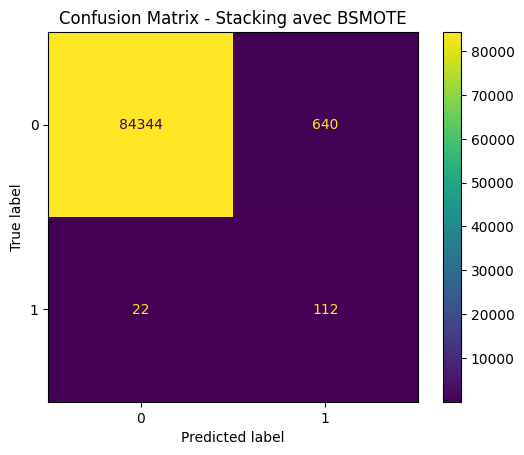

In [36]:
#Définir les modèles de base (base learners)
base_learners = [
    ('lr', LogisticRegression(solver='sag', random_state=42)),  # Logistic Regression
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=42))  # Decision Tree
]

#Méta-modèle (final estimator)
meta_model = LogisticRegression(solver='sag', random_state=42)

#StackingClassifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    n_jobs=-1  # Parallélisation
)

#Entraînement
stacking_clf.fit(x_train_bsmote, y_train_bsmote)

#Prédictions
y_pred = stacking_clf.predict(x_test)

#Calcul des métriques
acc_stacking_bsm = accuracy_score(y_test, y_pred)
F1_stacking_bsm = f1_score(y_test, y_pred)
precision_stacking_bsm = precision_score(y_test, y_pred)
recall_stacking_bsm = recall_score(y_test, y_pred)

# Affichage des métriques
print("Accuracy :", acc_stacking_bsm)
print("Precision :", precision_stacking_bsm)
print("Recall :", recall_stacking_bsm)
print("F1 Score :", F1_stacking_bsm)


# Stockage des résultats
list_accuracies.append(acc_stacking_bsm)
list_precisions.append(F1_stacking_bsm)
list_recalls.append(precision_stacking_bsm)
list_F1.append(recall_stacking_bsm)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Stacking avec BSMOTE")
plt.show()

In [37]:
#performances des methodes d'ensemble avec BSMOTE
results = pd.DataFrame({'Accuracy': [acc_voting_bsm, acc_adaboost_bsm, acc_stacking_bsm],
                        'Precision':[precision_voting_bsm, precision_adaboost_bsm, precision_stacking_bsm],
                        'Recall': [recall_voting_bsm, recall_adaboost_bsm, recall_stacking_bsm],
                        'F1 Score': [F1_voting_bsm, F1_adaboost_bsm, F1_stacking_bsm]})
results.index = ['Voting_bsm', 'Adaboost_bsm', 'Stacking_bsm']
results

,Accuracy,Precision,Recall,F1 Score
Voting_bsm,0.998332,0.482456,0.820896,0.607735
Adaboost_bsm,0.994819,0.207619,0.813433,0.330804
Stacking_bsm,0.992223,0.148936,0.835821,0.252822


Voting_bsm est le modèle d'apprentissage d'ensemble le plus équilibré parmi ceux-ci. Il a un bon recall et un F1 Score raisonnable, avec une precision modérée. Cela en fait un choix solide pour la détection de fraudes, bien qu'il puisse encore être amélioré pour réduire les faux positifs.

Adaboost_bsm et Stacking_bsm ont un excellent recall, mais leurs très faibles precisions entraînent des F1 Scores faibles. Ces modèles ont une bonne capacité à détecter les fraudes, mais ils génèrent beaucoup de faux positifs, ce qui les rend moins fiables dans un contexte où les faux positifs doivent être minimisés.

En résumé, Voting_bsm est le modèle d'apprentissage d'ensemble le plus efficace parmi ces trois, car il présente un meilleur compromis entre precision, recall, et F1 Score.

# VI - Comparaison et Interprétation des résultats

In [38]:
#Performance des methodes
results = pd.DataFrame({'Accuracy': [acc_lg, acc_knn, acc_tree,
                                     acc_rf, acc_bagging_lr, acc_xgb,
                                     acc_lg_sm, acc_knn_sm, acc_tree_sm,
                                     acc_voting_sm, acc_adaboost_sm, acc_stacking_sm,
                                     acc_lg_bsm, acc_knn_bsm, acc_tree_bsm,
                                     acc_voting_bsm, acc_adaboost_bsm, acc_stacking_bsm],
                        'Precision':[precision_lg, precision_knn, precision_tree,
                                     precision_rf, precision_bagging_lr, precision_xgb,
                                     precision_lg_sm, precision_knn_sm, precision_tree_sm,
                                     precision_voting_sm, precision_adaboost_sm, precision_stacking_sm,
                                     precision_lg_bsm, precision_knn_bsm, precision_tree_bsm,
                                     precision_voting_bsm, precision_adaboost_bsm, precision_stacking_bsm],
                        'Recall': [recall_lg, recall_knn, recall_tree,
                                   recall_rf, recall_bagging_lr, recall_xgb,
                                   recall_lg_sm, recall_knn_sm, recall_tree_sm,
                                   recall_voting_sm, recall_adaboost_sm, recall_stacking_sm,
                                   recall_lg_bsm, recall_knn_bsm, recall_tree_bsm,
                                   recall_voting_bsm, recall_adaboost_bsm, recall_stacking_bsm],
                        'F1 Score': [F1_lg, F1_knn, F1_tree,
                                     F1_rf, F1_bagging_lr, F1_xgb,
                                     F1_lg_sm, F1_knn_sm, F1_tree_sm,
                                     F1_voting_sm, F1_adaboost_sm, F1_stacking_sm,
                                     F1_lg_bsm, F1_knn_bsm, F1_tree_bsm,
                                     F1_voting_bsm, F1_adaboost_bsm, F1_stacking_bsm]})
results.index = ['LG', 'KNN', 'DT',
                 'RF', 'Bagging_lg', 'XGB',
                 'LG_sm', 'KNN_sm', 'TREE_sm',
                 'Voting_sm', 'Adaboost_sm', 'Stacking_sm',
                 'LG_bsm', 'KNN_bsm', 'TREE_bsm',
                 'Voting_bsm', 'Adaboost_bsm', 'Stacking_bsm']
results

,Accuracy,Precision,Recall,F1 Score
LG,0.999166,0.898734,0.529851,0.666667
KNN,0.999495,0.933333,0.731343,0.820084
DT,0.999166,0.717241,0.776119,0.745520
RF,0.999542,0.943925,0.753731,0.838174
Bagging_lg,0.999154,0.887500,0.529851,0.663551
XGB,0.999554,0.944444,0.761194,0.842975
LG_sm,0.975716,0.055632,0.902985,0.104807
KNN_sm,0.998238,0.465517,0.805970,0.590164
TREE_sm,0.997686,0.386282,0.798507,0.520681
Voting_sm,0.996135,0.266187,0.828358,0.402904


In [48]:
# Extraction des colonnes sous forme de listes
list_accuracies = results['Accuracy'].tolist()
list_precisions = results['Precision'].tolist()
list_recalls = results['Recall'].tolist()
list_F1 = results['F1 Score'].tolist()

# Vérification des longueurs (optionnel, pour débogage)
assert len(results.index) == len(list_accuracies), "Erreur : Longueur des indices et des métriques non concordante."
assert len(results.index) == len(list_precisions), "Erreur : Longueur des indices et des métriques non concordante."
assert len(results.index) == len(list_recalls), "Erreur : Longueur des indices et des métriques non concordante."
assert len(results.index) == len(list_F1), "Erreur : Longueur des indices et des métriques non concordante."


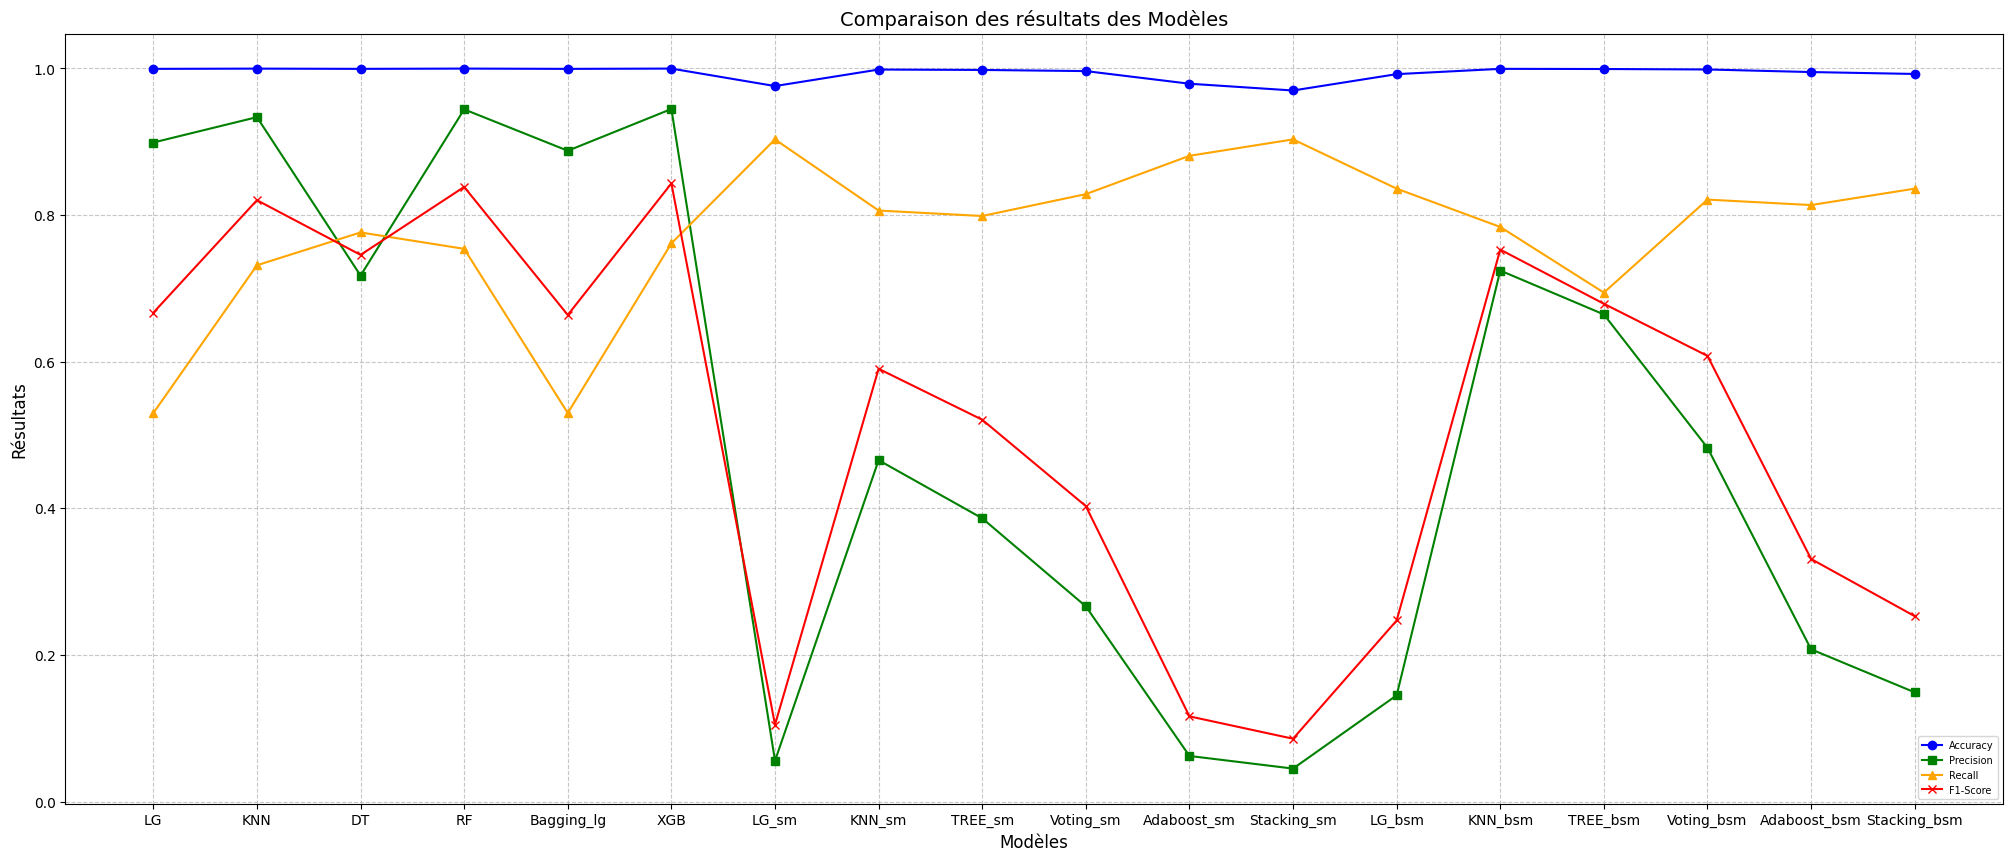

In [49]:
# Création du graphique
plt.figure(figsize=(25, 10))
plt.grid(True, linestyle='--', alpha=0.7)
z = results.index

plt.plot(z, list_accuracies, label='Accuracy', color='blue', marker='o')
plt.plot(z, list_precisions, label='Precision', color='green', marker='s')
plt.plot(z, list_recalls, label='Recall', color='orange', marker='^')
plt.plot(z, list_F1, label='F1-Score', color='red', marker='x')
plt.legend(loc='lower right', fontsize=7, frameon=True)
plt.xlabel('Modèles', fontsize=12)
plt.ylabel('Résultats', fontsize=12)
plt.title('Comparaison des résultats des Modèles', fontsize=14)
plt.show()

Modèles Préférés Sans Balancement :
XGB est le choix optimal grâce à son F1 Score élevé et son équilibre entre précision et rappel.
RF est une alternative robuste, avec des performances proches de XGB.
KNN est légèrement moins performant, mais reste un bon choix dans des scénarios nécessitant une meilleure balance entre précision et rappel.

Cas d'Utilisation de SMOTE :
Les modèles avec SMOTE sont efficaces pour maximiser le rappel, ce qui peut être utile pour des applications où détecter tous les cas de fraude est prioritaire.
Cependant, leur faible précision et leur forte production de faux positifs limitent leur applicabilité.

Modèles Préférés avec BSMOTE :
KNN_bsm se démarque comme le modèle le plus équilibré parmi ceux utilisant BSMOTE.
Cependant, ses performances restent inférieures à celles des meilleurs modèles non balancés.

Recommandation Globale :
Pour des données déséquilibrées, il est préférable de s'appuyer sur XGB ou RF sans balancement. Ces modèles offrent des performances solides tout en évitant les compromis liés au surajustement induit par les techniques de balancement.